### Notebook to explore the correlation between features in the train set in order to exploit interesting results

In [1]:
import pandas as pd
from pathlib import Path
from typing import Dict, List
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn import preprocessing
from treelib import Node, Tree

## Variables

In [2]:
%cd ../..
%ls

d:\polimi\Magistrale\2°anno-2°semestre\Challenge RecSys\Recsys-Challenge-2023
 Il volume nell'unit� D � DATA
 Numero di serie del volume: C2DC-2F0E

 Directory di d:\polimi\Magistrale\2�anno-2�semestre\Challenge RecSys\Recsys-Challenge-2023

22/05/2023  15:23    <DIR>          .
22/05/2023  15:23    <DIR>          ..
06/04/2023  16:39    <DIR>          .conda
22/05/2023  15:23               261 .env.example
22/05/2023  15:23               336 .gitignore
27/04/2023  18:08    <DIR>          .venv
21/05/2023  11:30    <DIR>          .vscode
10/05/2023  16:15    <DIR>          __pycache__
21/05/2023  11:30             3.905 BestParameters.py
07/05/2023  12:37    <DIR>          catboost_info
15/05/2023  16:05    <DIR>          data
06/04/2023  11:57    <DIR>          data_no_split
07/05/2023  12:28             7.774 Dataset general considerations.md
22/04/2023  19:46               230 leaderboard.md
13/04/2023  18:23               635 Links to useful materials.md
13/04/2023  18:23    <DIR> 

In [3]:
#TRAIN_VAL_DATA_PATH: Path = os.path.join('data', 'train_val_Enc_Counters.parquet')
TRAIN_VAL_DATA_PATH: Path = os.path.join('data', 'train_val.parquet')

In [4]:
df: pd.DataFrame = pd.read_parquet(TRAIN_VAL_DATA_PATH) 
df = df.astype({f"f_{i}": "category" for i in range(2, 33)})

## Utility Functions

In [6]:
numerical_columns: List[str] = [f"f_{i}" for i in range(42, 80)]
binary_columns: List[str] = [f"f_{i}" for i in range(33, 42)]
categorical_columns: List[str] = [f"f_{i}" for i in range(2, 33)]

In [7]:
def print_tree(df, f1, f2):
    vals=[]
    ind, _ = np.unique(df[f1], return_counts=True)
    for i in ind:
        temp=df[df[f1]==i]
        val=np.unique(temp[f2], return_counts=True)[0]
        tree = Tree()
        tree.create_node(str(i), str(i))  # No parent means its the root node
        for el in val:
            tree.create_node(el, el, parent=str(i))
        tree.show()
        #print(i, val)
        vals.append(val)
    common_elements = set()
    for i in range(len(vals)):
        for j in range(i+1, len(vals)):
            common = set(vals[i]).intersection(vals[j])
            common_elements |= common
    print(common_elements)

In [8]:
def combinations_analysis(df,f1,f2):
    print(f1+'==True,'+f2+'==True')
    temp=df.loc[(df[f1]==True) & (df[f2]==True)]
    print('shape: ', temp.shape[0])
    if(temp.shape[0]>0):
        print('is_installed rate: ', temp[temp['is_installed']==True].shape[0]/temp.shape[0])
    print(f1+'==False,'+f2+'==True')
    temp=df.loc[(df[f1]==False) & (df[f2]==True)]
    print('shape: ', temp.shape[0])
    if(temp.shape[0]>0):
        print('is_installed rate: ', temp[temp['is_installed']==True].shape[0]/temp.shape[0])
    print(f1+'==True,'+f2+'==False')
    temp=df.loc[(df[f1]==True) & (df[f2]==False)]
    print('shape: ', temp.shape[0])
    if(temp.shape[0]>0):
        print('is_installed rate: ', temp[temp['is_installed']==True].shape[0]/temp.shape[0])
    print(f1+'==False,'+f2+'==False')
    temp=df.loc[(df[f1]==False) & (df[f2]==False)]
    print('shape: ', temp.shape[0])
    if(temp.shape[0]>0):
        print('is_installed rate: ', temp[temp['is_installed']==True].shape[0]/temp.shape[0])
    

* f_9 is periodical every 7 days!

In [76]:
DAY = 45
for i in range(0,22):
    print(DAY)
    print(np.unique(df[df['f_1']==DAY]['f_9'], return_counts=True))
    DAY+=1

45
(array([1, 3], dtype=int64), array([135335,   4871], dtype=int64))
46
(array([2, 3], dtype=int64), array([ 16550, 217527], dtype=int64))
47
(array([2, 5], dtype=int64), array([211060,   9075], dtype=int64))
48
(array([0, 5], dtype=int64), array([  2950, 139276], dtype=int64))
49
(array([0, 4], dtype=int64), array([179898,  11247], dtype=int64))
50
(array([4, 6], dtype=int64), array([211358,   3046], dtype=int64))
51
(array([1, 6], dtype=int64), array([  3350, 133216], dtype=int64))
52
(array([1, 3], dtype=int64), array([162888,   2650], dtype=int64))
53
(array([2, 3], dtype=int64), array([  4478, 117401], dtype=int64))
54
(array([2, 5], dtype=int64), array([116135,   2845], dtype=int64))
55
(array([0, 5], dtype=int64), array([  3403, 156074], dtype=int64))
56
(array([0, 4], dtype=int64), array([180075,   7385], dtype=int64))
57
(array([4, 6], dtype=int64), array([166017,  12991], dtype=int64))
58
(array([1, 6], dtype=int64), array([  1508, 119900], dtype=int64))
59
(array([1, 3], dt

## Correlation on numerical features
### Comparison between the 3 different methods available in pandas

In [63]:
pearson=df[numerical_columns].corr()

In [9]:
kendall=df[numerical_columns].corr(method='kendall')

d:\polimi\Magistrale\2°anno-2°semestre\Challenge RecSys\Recsys-Challenge-2023\.venv\lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [10]:
spearman=df[numerical_columns].corr(method='spearman')

In [29]:
#return index of columns with correlation > 0.5
pearson[pearson['f_44']>0.5].index
for feature in numerical_columns:
    indexes_p=pearson[pearson[feature]>0.5].index
    indexes_k=kendall[kendall[feature]>0.5].index
    indexes_s=spearman[spearman[feature]>0.5].index
    print('====='+feature+'====')
    print('pearson:')
    for index in indexes_p:
        if feature!=index:
            print(index)
    print('kendall:')
    for index in indexes_k:
        if feature!=index:
            print(index)
    print('spearman:')
    for index in indexes_s:
        if feature!=index:
            print(index)
            

=====f_42====
pearson:
f_61
f_63
kendall:
spearman:
f_61
f_62
f_74
f_75
f_76
=====f_43====
pearson:
f_66
f_70
kendall:
f_66
f_70
spearman:
f_66
f_70
=====f_44====
pearson:
f_45
f_46
f_47
kendall:
f_45
f_46
f_47
spearman:
f_45
f_46
f_47
=====f_45====
pearson:
f_44
f_46
f_47
kendall:
f_44
f_46
f_47
spearman:
f_44
f_46
f_47
=====f_46====
pearson:
f_44
f_45
f_47
kendall:
f_44
f_45
f_47
spearman:
f_44
f_45
f_47
=====f_47====
pearson:
f_44
f_45
f_46
kendall:
f_44
f_45
f_46
spearman:
f_44
f_45
f_46
=====f_48====
pearson:
f_49
f_50
kendall:
f_49
f_50
spearman:
f_49
f_50
=====f_49====
pearson:
f_48
f_50
kendall:
f_48
f_50
spearman:
f_48
f_50
=====f_50====
pearson:
f_48
f_49
kendall:
f_48
f_49
spearman:
f_48
f_49
=====f_51====
pearson:
kendall:
f_64
spearman:
f_64
=====f_52====
pearson:
f_53
f_54
kendall:
f_53
f_54
spearman:
f_53
f_54
f_55
=====f_53====
pearson:
f_52
f_54
kendall:
f_52
f_54
spearman:
f_52
f_54
=====f_54====
pearson:
f_52
f_53
kendall:
f_52
f_53
spearman:
f_52
f_53
f_57
=====f_55

In [15]:
def correlation_heatmap(correlation):
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlation, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()

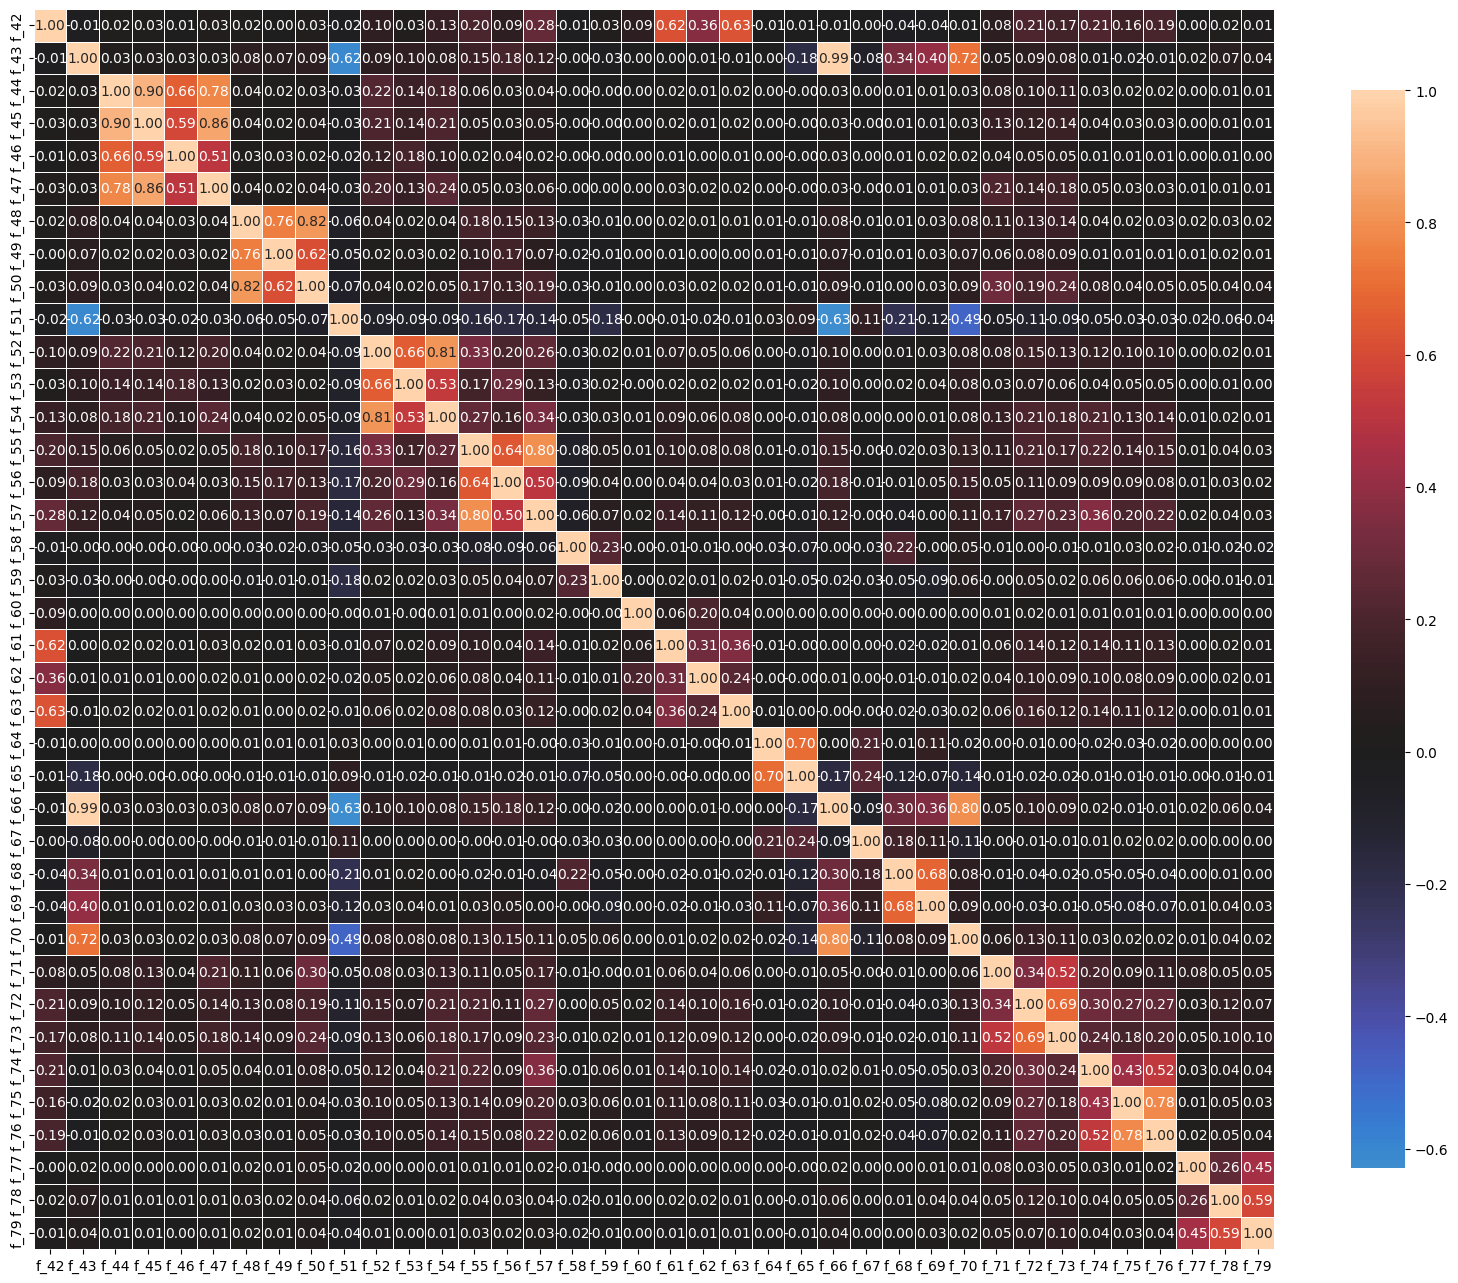

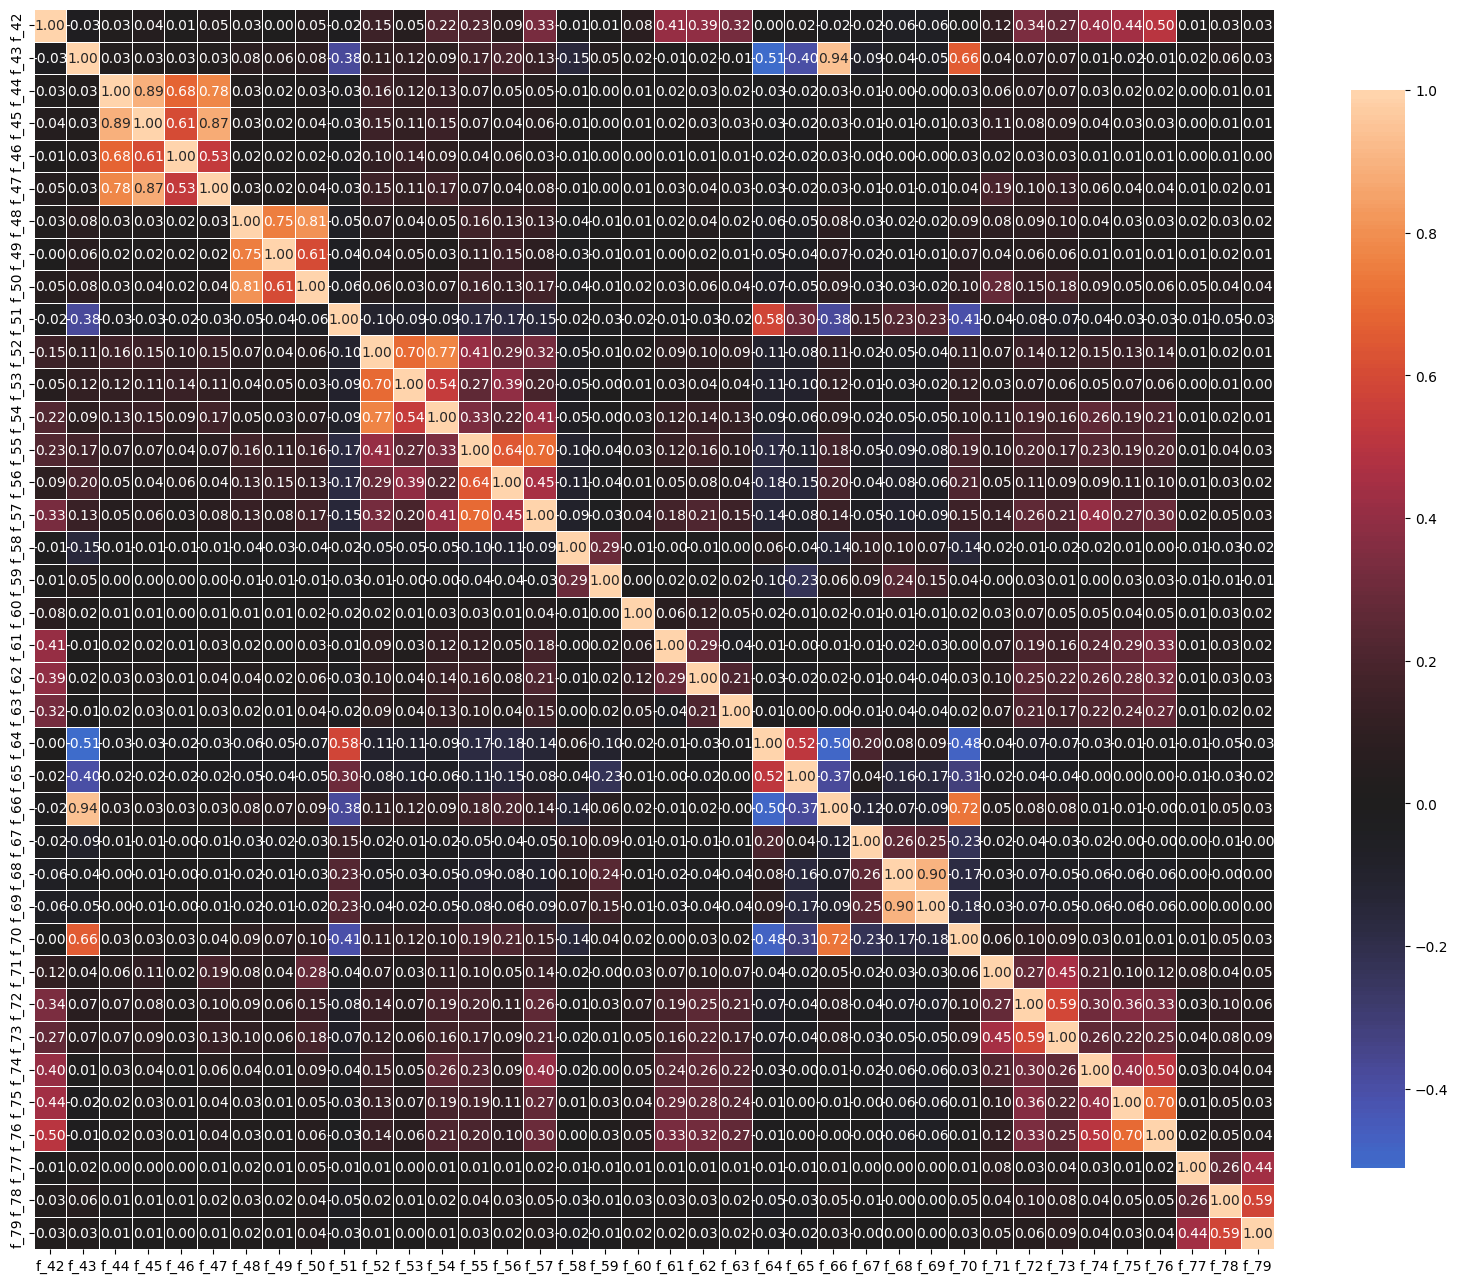

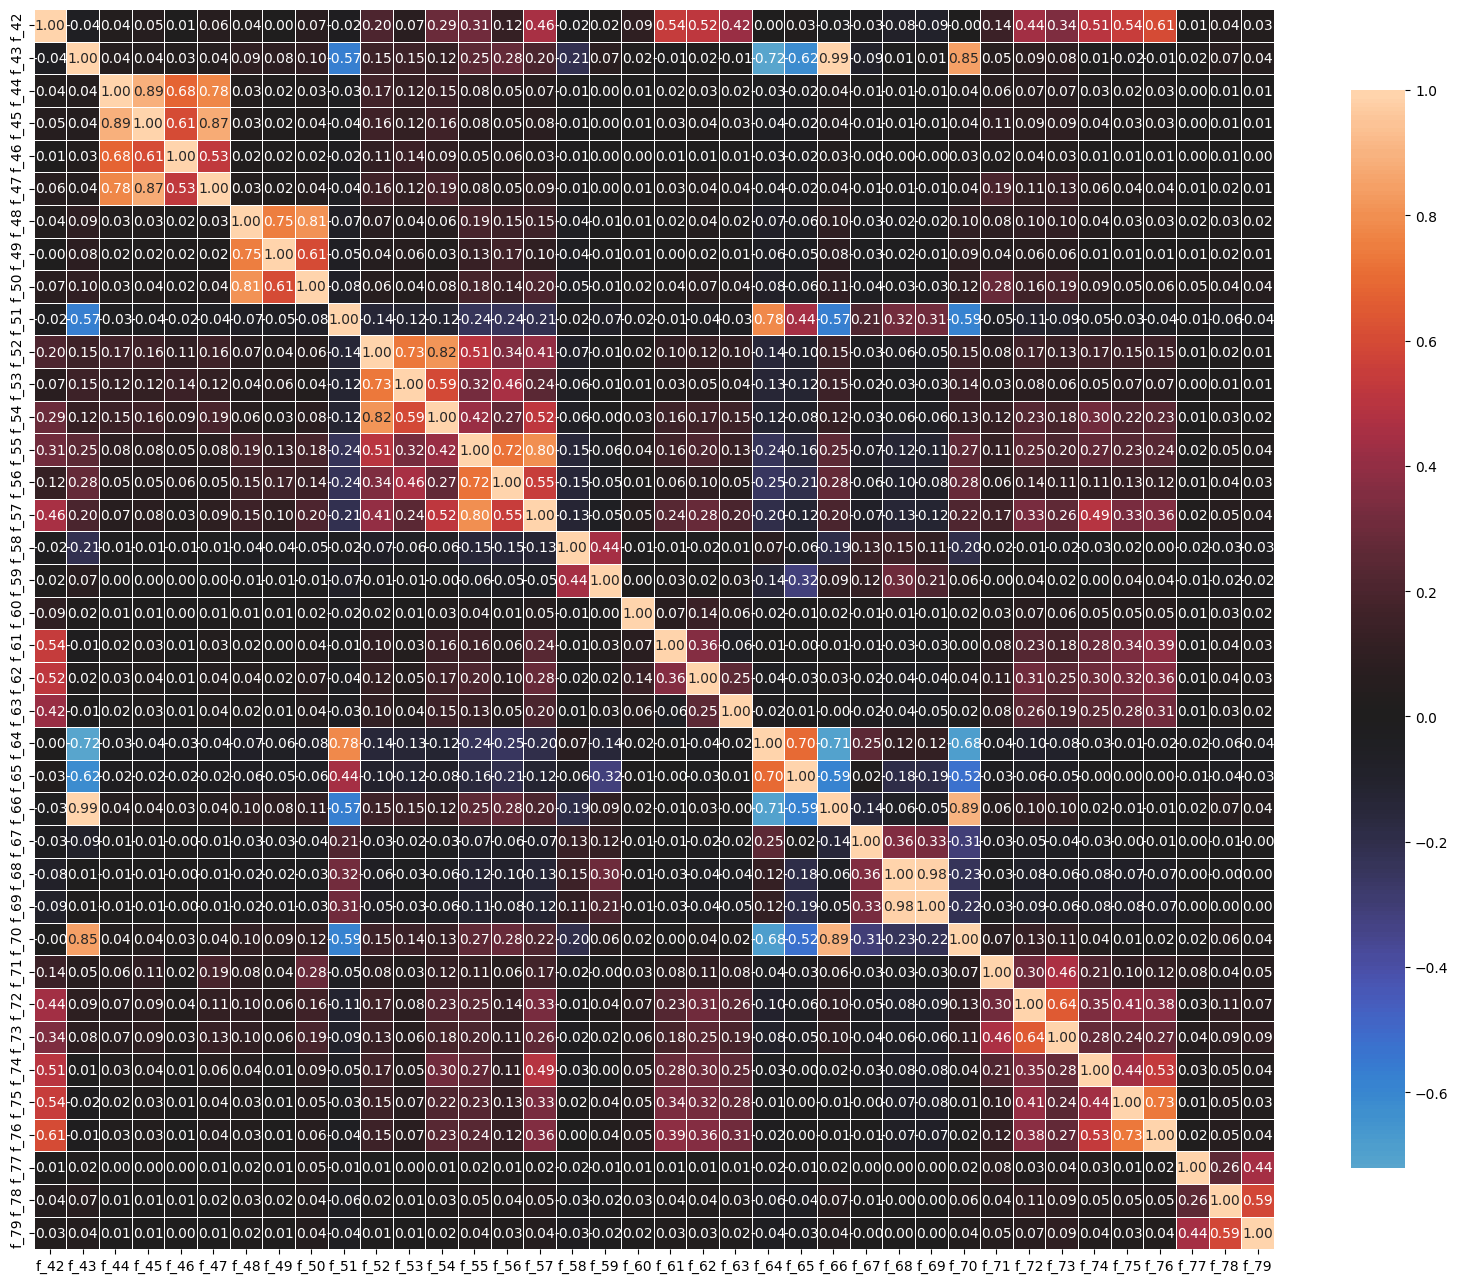

In [54]:
correlation_heatmap(pearson)
correlation_heatmap(kendall)
correlation_heatmap(spearman)

## Correlation for categorical variables
* Here there is the correlation with the pearson method => **IT IS WRONG** (See below bor the correct one)

In [94]:
pearson_categorical=df[categorical_columns].corr()

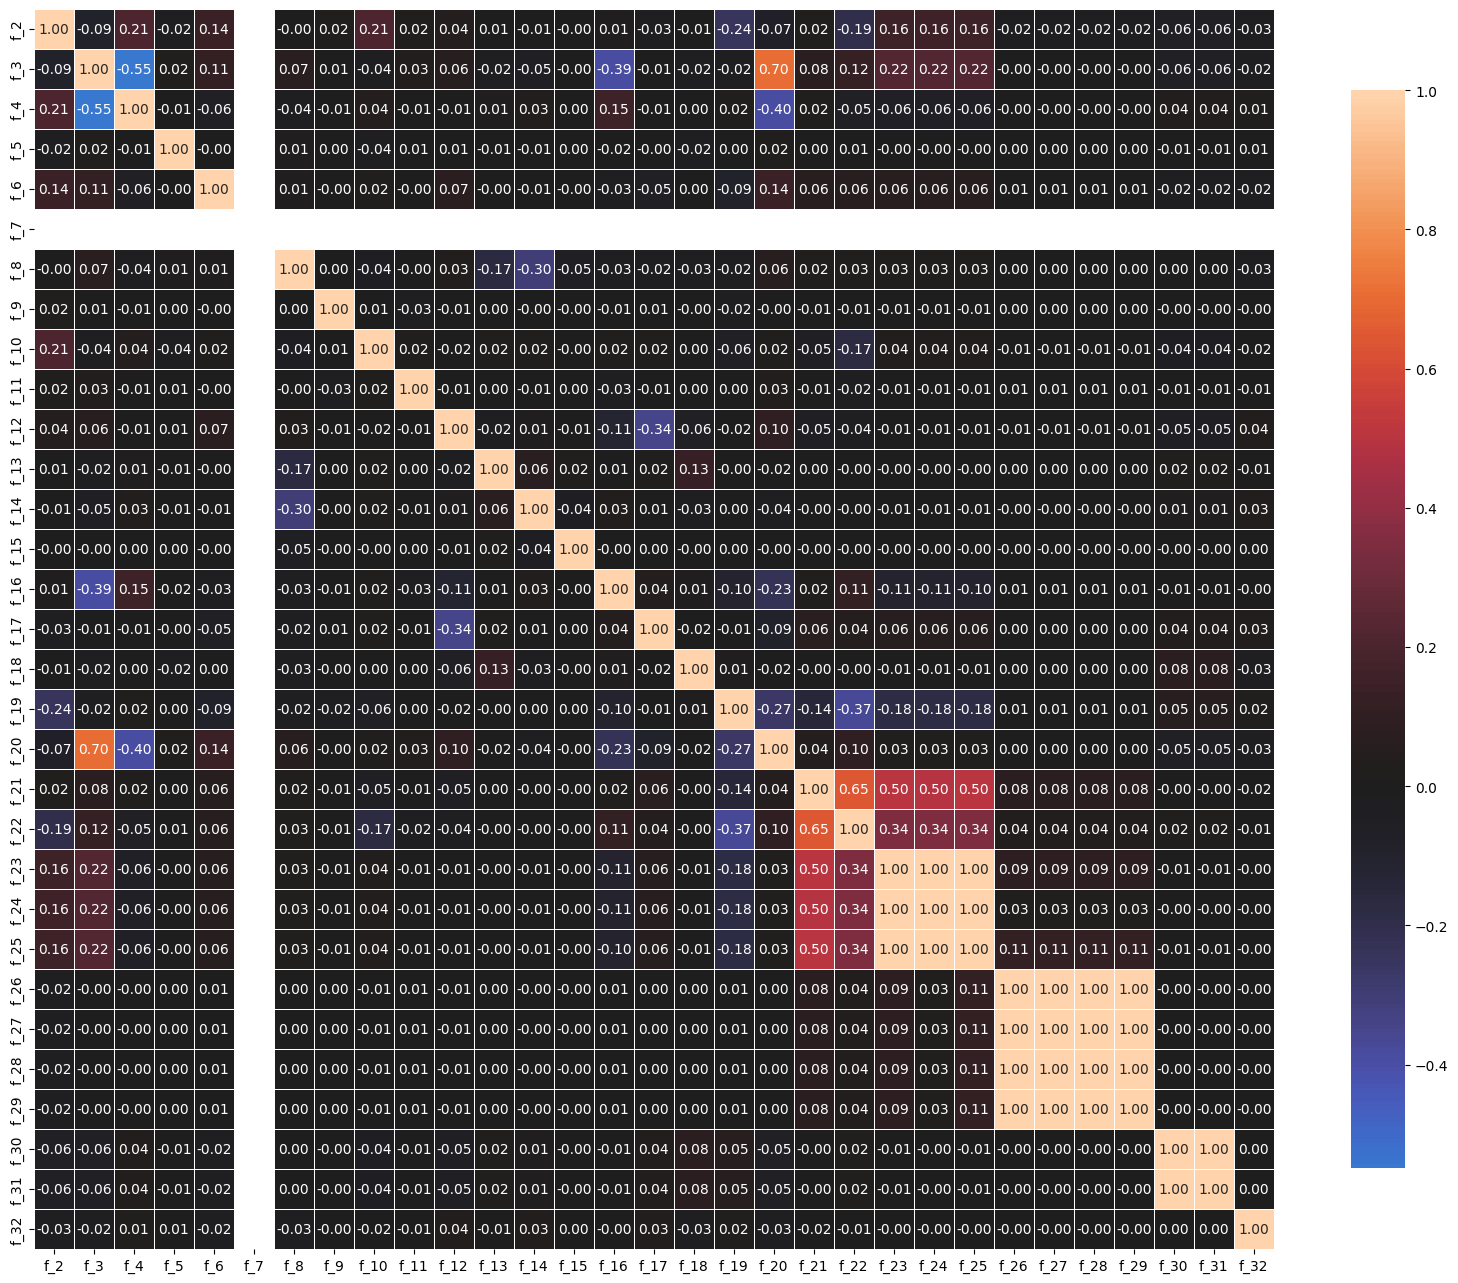

In [75]:
correlation_heatmap(pearson_categorical)

In [ ]:
to_remove=['f_7','f_24', 'f_25', 'f_27', 'f_28', 'f_29','f_31']
for elem in to_remove:
    categorical_columns.remove(elem)


In [97]:
DAY = 45
for i in range(0,22):
    print(DAY)
    print(np.unique(df[df['f_1']==DAY]['f_23'], return_counts=True))
    DAY+=1

45
(array([0, 2, 3], dtype=int64), array([130911,   9277,     18], dtype=int64))
46
(array([0, 2, 3], dtype=int64), array([222057,  12001,     19], dtype=int64))
47
(array([0, 2, 3], dtype=int64), array([208463,  11658,     14], dtype=int64))
48
(array([0, 2, 3], dtype=int64), array([134740,   7474,     12], dtype=int64))
49
(array([0, 2, 3], dtype=int64), array([174392,  16734,     19], dtype=int64))
50
(array([0, 2, 3], dtype=int64), array([198728,  15651,     25], dtype=int64))
51
(array([0, 2, 3], dtype=int64), array([124210,  12333,     23], dtype=int64))
52
(array([0, 2, 3], dtype=int64), array([147979,  17541,     18], dtype=int64))
53
(array([0, 2, 3], dtype=int64), array([103453,  18404,     22], dtype=int64))
54
(array([0, 2, 3], dtype=int64), array([109698,   9255,     27], dtype=int64))
55
(array([0, 2, 3], dtype=int64), array([149279,  10169,     29], dtype=int64))
56
(array([0, 2, 3], dtype=int64), array([173205,  14232,     23], dtype=int64))
57
(array([0, 2, 3], dtype=i

### More on categorical variables

**CORRECT METHOD**

* Using Cramer's V correlation which is the best for nominal categorical variables 

In [149]:
# columns from f_21 to f_32
columns=['f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32']
data=df[categorical_columns]
data

f_2 f_3  f_4 f_5   f_6 f_7 f_8 f_9 f_10 f_11  ... f_23 f_24 f_25   
0         29   4  123   4  2334   0   0   6    2   22  ...    0    0    0  \
1         87   0  451   0  3625   0   4   0    0    3  ...    0    0    0   
2         87   0  451   4  3625   0   4   6    2    1  ...    0    0    0   
3         57   4  148   4  4793   0   4   4    0    8  ...    0    0    0   
4         87   0  614   0   100   0   0   5    2    1  ...    0    0    0   
...      ...  ..  ...  ..   ...  ..  ..  ..  ...  ...  ...  ...  ...  ...   
3485847   55   4   56   4  2934   0   4   5    0    1  ...    0    0    0   
3485848  117   4  235   3  4169   0   1   1    2    7  ...    0    0    0   
3485849  114   4  191   4   155   0   4   0    0   12  ...    0    0    0   
3485850  135   4  136   2  1488   0   1   5    1   20  ...    0    0    0   
3485851  135   4  218   0   649   0   4   0    2   22  ...    0    0    0   

        f_26 f_27 f_28 f_29 f_30 f_31 f_32  
0          0    0    0    0    2    2    3  
1          0    0    0    0    2    2    3  
2          0    0    0    0    2    2    3  
3          0    0    0    0    0    0    2  
4          0    0    0    0    0    0    3  
...      ...  ...  ...  ...  ...  ...  ...  
3485847    0    0    0    0    2    2    3  
3485848    0    0    0    0    2    2    3  
3485849    0    0    0    0    0    0    3  
3485850    0    0    0    0    2    2    0  
3485851    0    0    0    0    2    2    3  

[3485852 rows x 31 columns]

In [10]:

from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])




NameError: name 'data' is not defined

In [151]:
data_encoded.head()

f_2  f_3  f_4  f_5   f_6  f_7  f_8  f_9  f_10  f_11  ...  f_23  f_24  f_25   
0   28    4  123    4  2302    0    0    6     2    22  ...     0     0     0  \
1   86    0  449    0  3583    0    4    0     0     3  ...     0     0     0   
2   86    0  449    4  3583    0    4    6     2     1  ...     0     0     0   
3   56    4  147    4  4733    0    4    4     0     8  ...     0     0     0   
4   86    0  609    0    99    0    0    5     2     1  ...     0     0     0   

   f_26  f_27  f_28  f_29  f_30  f_31  f_32  
0     0     0     0     0     2     2     3  
1     0     0     0     0     2     2     3  
2     0     0     0     0     2     2     3  
3     0     0     0     0     0     0     2  
4     0     0     0     0     0     0     3  

[5 rows x 31 columns]

In [14]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [153]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



cramer



C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning:

f_2   f_3   f_4   f_5   f_6  f_7   f_8   f_9  f_10  f_11  ...  f_23   
f_2   1.00  0.67  1.00  0.11  0.98  NaN  0.05  0.09  0.29  0.05  ...  1.00  \
f_3   0.67  1.00  0.77  0.04  0.86  NaN  0.04  0.04  0.07  0.04  ...  0.14   
f_4   1.00  0.77  1.00  0.12  0.74  NaN  0.06  0.13  0.31  0.07  ...  1.00   
f_5   0.11  0.04  0.12  1.00  0.14  NaN  0.05  0.01  0.59  0.03  ...  0.04   
f_6   0.98  0.86  0.74  0.14  1.00  NaN  0.07  0.17  0.32  0.09  ...  0.97   
f_7    NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  ...   NaN   
f_8   0.05  0.04  0.06  0.05  0.07  NaN  1.00  0.00  0.04  0.02  ...  0.02   
f_9   0.09  0.04  0.13  0.01  0.17  NaN  0.00  1.00  0.01  0.10  ...  0.02   
f_10  0.29  0.07  0.31  0.59  0.32  NaN  0.04  0.01  1.00  0.05  ...  0.05   
f_11  0.05  0.04  0.07  0.03  0.09  NaN  0.02  0.10  0.05  1.00  ...  0.04   
f_12  0.17  0.08  0.18  0.11  0.39  NaN  0.07  0.02  0.12  0.02  ...  0.06   
f_13  0.01  0.03  0.02  0.06  0.05  NaN  0.29  0.01  0.05  0.01  ...  0.02   
f_14  0.03  0.04  0.03  0.05  0.05  NaN  0.25  0.01  0.06  0.01  ...  0.01   
f_15  0.05  0.10  0.04  0.13  0.04  NaN  0.97  0.04  0.12  0.04  ...  0.05   
f_16  0.28  0.39  0.32  0.06  0.32  NaN  0.03  0.03  0.08  0.03  ...  0.09   
f_17  0.11  0.08  0.12  0.10  0.24  NaN  0.06  0.02  0.08  0.02  ...  0.06   
f_18  0.02  0.04  0.02  0.05  0.04  NaN  0.08  0.02  0.05  0.02  ...  0.02   
f_19  0.97  0.57  0.97  0.08  0.96  NaN  0.04  0.05  0.22  0.04  ...  0.49   
f_20  0.99  0.62  0.99  0.10  0.98  NaN  0.05  0.07  0.27  0.04  ...  0.95   
f_21  1.00  0.58  1.00  0.07  0.98  NaN  0.04  0.05  0.18  0.03  ...  1.00   
f_22  1.00  0.31  1.00  0.07  0.98  NaN  0.02  0.04  0.17  0.03  ...  0.84   
f_23  1.00  0.14  1.00  0.04  0.97  NaN  0.02  0.02  0.05  0.04  ...  1.00   
f_24  1.00  0.14  1.00  0.04  0.97  NaN  0.02  0.02  0.05  0.04  ...  1.00   
f_25  1.00  0.17  1.00  0.04  0.96  NaN  0.02  0.02  0.05  0.05  ...  1.00   
f_26  1.00  0.03  1.00  0.01  0.92  NaN  0.00  0.01  0.01  0.01  ...  1.00   
f_27  1.00  0.03  1.00  0.01  0.92  NaN  0.00  0.01  0.01  0.01  ...  1.00   
f_28  1.00  0.03  1.00  0.01  0.92  NaN  0.00  0.01  0.01  0.01  ...  1.00   
f_29  1.00  0.03  1.00  0.01  0.92  NaN  0.00  0.01  0.01  0.01  ...  1.00   
f_30  0.15  0.05  0.20  0.03  0.23  NaN  0.01  0.07  0.04  0.04  ...  0.00   
f_31  0.15  0.05  0.20  0.03  0.23  NaN  0.01  0.07  0.04  0.04  ...  0.00   
f_32  0.12  0.02  0.13  0.04  0.20  NaN  0.03  0.01  0.02  0.03  ...  0.01   

      f_24  f_25  f_26  f_27  f_28  f_29  f_30  f_31  f_32  
f_2   1.00  1.00  1.00  1.00  1.00  1.00  0.15  0.15  0.12  
f_3   0.14  0.17  0.03  0.03  0.03  0.03  0.05  0.05  0.02  
f_4   1.00  1.00  1.00  1.00  1.00  1.00  0.20  0.20  0.13  
f_5   0.04  0.04  0.01  0.01  0.01  0.01  0.03  0.03  0.04  
f_6   0.97  0.96  0.92  0.92  0.92  0.92  0.23  0.23  0.20  
f_7    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
f_8   0.02  0.02  0.00  0.00  0.00  0.00  0.01  0.01  0.03  
f_9   0.02  0.02  0.01  0.01  0.01  0.01  0.07  0.07  0.01  
f_10  0.05  0.05  0.01  0.01  0.01  0.01  0.04  0.04  0.02  
f_11  0.04  0.05  0.01  0.01  0.01  0.01  0.04  0.04  0.03  
f_12  0.06  0.07  0.02  0.02  0.02  0.02  0.06  0.06  0.25  
f_13  0.02  0.02  0.00  0.00  0.00  0.00  0.17  0.17  0.03  
f_14  0.01  0.01  0.00  0.00  0.00  0.00  0.03  0.03  0.03  
f_15  0.05  0.05  0.03  0.03  0.03  0.03  0.06  0.06  0.08  
f_16  0.09  0.11  0.04  0.04  0.04  0.04  0.04  0.04  0.02  
f_17  0.06  0.07  0.02  0.02  0.02  0.02  0.06  0.06  0.44  
f_18  0.02  0.03  0.00  0.00  0.00  0.00  0.17  0.17  0.09  
f_19  0.49  0.59  0.07  0.07  0.07  0.07  0.11  0.11  0.09  
f_20  0.95  0.93  0.84  0.84  0.84  0.84  0.13  0.13  0.10  
f_21  1.00  1.00  1.00  1.00  1.00  1.00  0.07  0.07  0.05  
f_22  0.84  1.00  1.00  1.00  1.00  1.00  0.04  0.04  0.02  
f_23  1.00  1.00  1.00  1.00  1.00  1.00  0.00  0.00  0.01  
f_24  1.00  1.00  1.00  1.00  1.00  1.00  0.00  0.00  0.01  
f_25  1.00  1.00  1.00  1.00  1.00  1.00  0.00

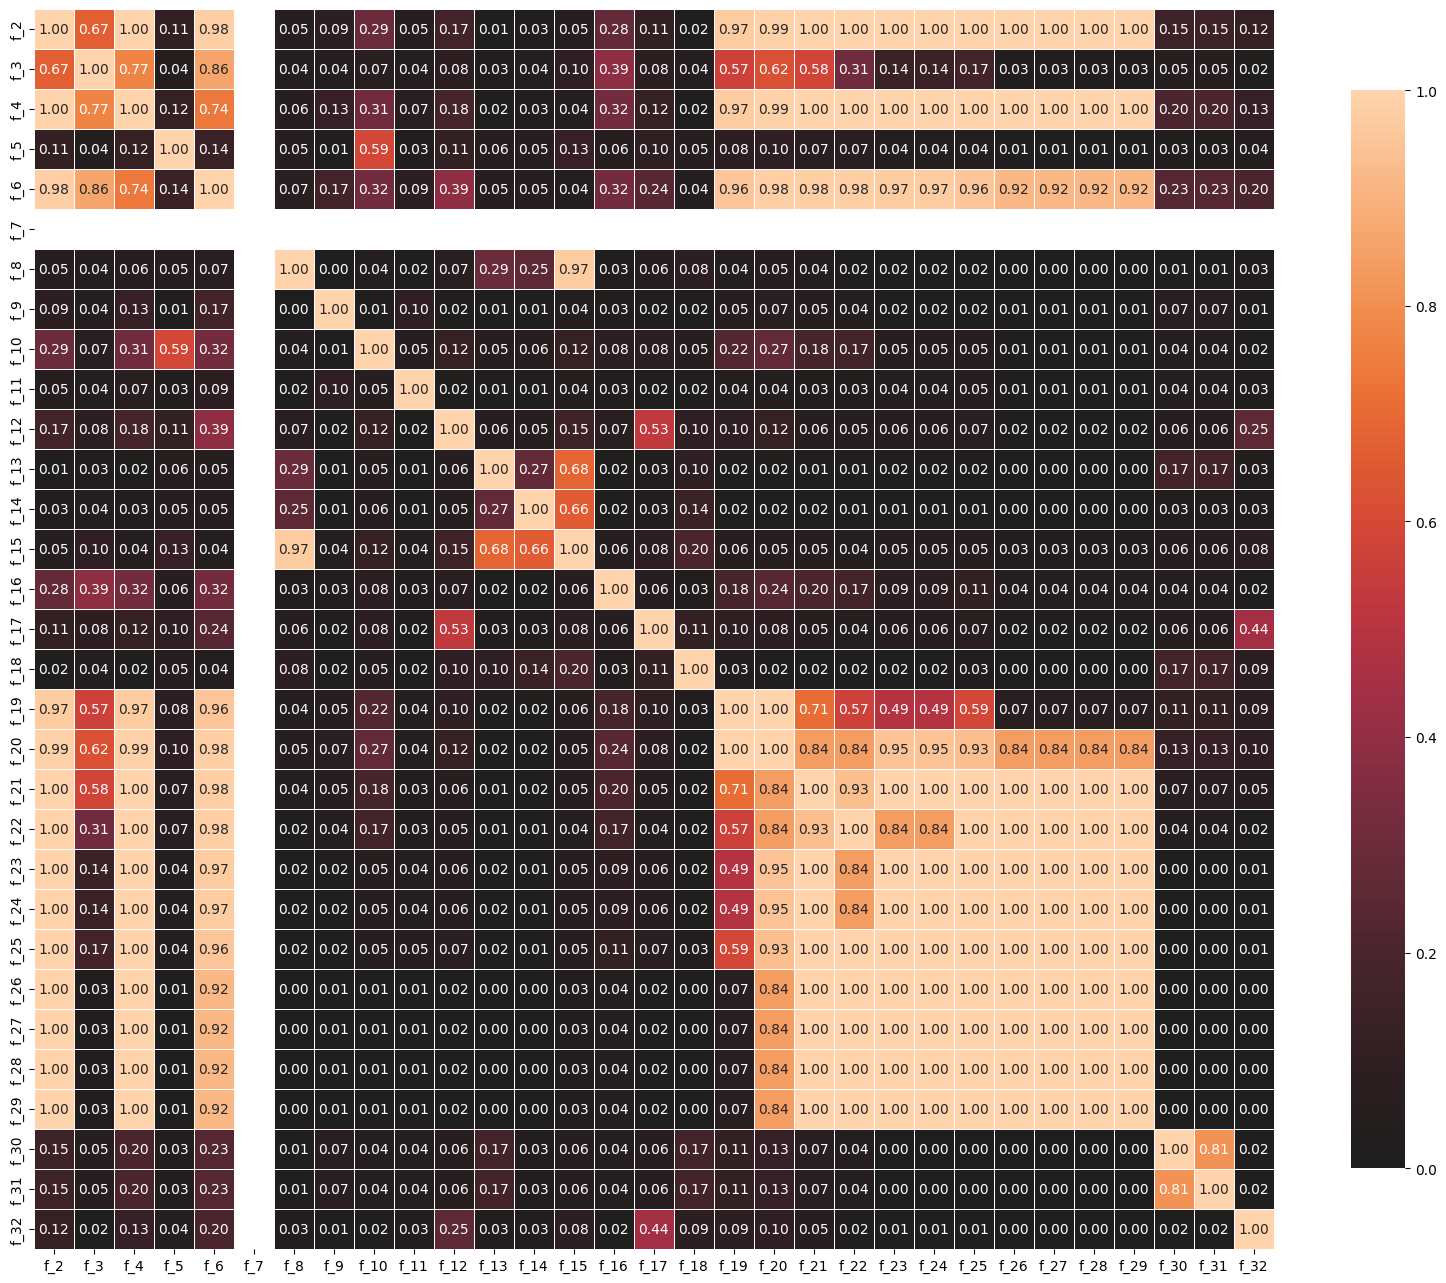

In [154]:
correlation_heatmap(cramer)

* f_8 with f_15

### Check of subcategories

* f_19 - f_20

In [165]:
ind, val= np.unique(df['f_19'], return_counts=True)
for i in ind:
    temp=df[df['f_19']==i]
    print(i, np.unique(temp['f_20'], return_counts=True)[0])

0 [0]
1 [44 49 52]
2 [50]
3 [40]
4 [12 55]
5 [14 51 54]
6 [10 11 16 21 24 28 41]
7 [13 15 17]
8 [19 23 26 29]
9 [18 43 45]
10 [25 31 33 36 39]
11 [34]
12 [2 3 4 6]
13 [ 7 20 27 46 47]
14 [1]
15 [22 30 37]
16 [35 38]
17 [ 5  8  9 42 56]
18 [32]


* f_21 - f_2

In [166]:
vals=[]
ind, _ = np.unique(df['f_21'], return_counts=True)
for i in ind:
    temp=df[df['f_21']==i]
    val=np.unique(temp['f_2'], return_counts=True)[0]
    print(i, val)
    vals.append(val)
#find common elements between all the lists
common_elements = set(vals[0]).intersection(*vals)
print(common_elements)

0 [  1   2   3   6   7   8   9  12  13  14  15  16  17  20  22  23  24  25
  26  28  29  30  32  33  34  35  37  38  40  41  43  49  50  51  52  53
  55  56  57  58  59  60  62  64  66  69  70  71  73  75  77  79  80  81
  82  84  86  88  91  92  93  97  98  99 100 102 103 105 107 111 112 113
 114 117 118 120 121 123 124 126 128 129 130 131 133 135 136 137 138]
1 [72]
2 [132]
3 [39 87]
4 [ 21  46  74  83  95 110]
5 [78]
6 [ 11  18  89 116]
7 [108]
8 [ 47 134]
9 [67]
10 [26]
11 [0]
12 [10]
13 [115]
14 [101]
15 [36 65 68]
16 [ 54 122]
17 [19]
18 [ 4 76]
19 [61]
20 [ 42 109]
21 [106]
22 [104]
23 [63]
24 [ 44 119]
25 [94]
26 [96]
27 [90]
28 [5]
29 [131]
30 [48]
31 [45]
33 [31]
34 [85]
set()


* f_21 to f_29 with f_2

In [168]:
#columns from f_21 to f_29
columns=['f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29']
for column in columns:
    vals=[]
    ind, _ = np.unique(df[column], return_counts=True)
    for i in ind:
        temp=df[df[column]==i]
        val=np.unique(temp['f_2'], return_counts=True)[0]
        #print(i, val)
        vals.append(val)
    #find common elements between all the lists
    common_elements = set(vals[0]).intersection(*vals)
    print(column)
    print(common_elements)

f_21
set()
f_22
set()
f_23
set()
f_24
set()
f_25
set()
f_26
set()
f_27
set()
f_28
set()
f_29
set()


* f_23 to f_29 together

In [170]:
#columns from f_21 to f_29
columns=['f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29']
for column1 in columns:
    ind, _ = np.unique(df[column], return_counts=True)
    for column2 in columns:
        if column1!=column2:
            vals=[]
            for i in ind:
                temp=df[df[column1]==i]
                val=np.unique(temp[column2], return_counts=True)[0]
                #print(i, val)
                vals.append(val)
            #find common elements between all the lists
            common_elements = set(vals[0]).intersection(*vals)
            print(column1, column2)
            print(common_elements)

f_23 f_24
set()
f_23 f_25
{0}
f_23 f_26
{0}
f_23 f_27
{0}
f_23 f_28
{0}
f_23 f_29
{0}
f_24 f_23
set()
f_24 f_25
set()
f_24 f_26
set()
f_24 f_27
set()
f_24 f_28
set()
f_24 f_29
set()
f_25 f_23
set()
f_25 f_24
set()
f_25 f_26
{0}
f_25 f_27
{0}
f_25 f_28
{0}
f_25 f_29
{0}
f_26 f_23
set()
f_26 f_24
set()
f_26 f_25
set()
f_26 f_27
set()
f_26 f_28
set()
f_26 f_29
set()
f_27 f_23
set()
f_27 f_24
set()
f_27 f_25
set()
f_27 f_26
set()
f_27 f_28
set()
f_27 f_29
set()
f_28 f_23
set()
f_28 f_24
set()
f_28 f_25
set()
f_28 f_26
set()
f_28 f_27
set()
f_28 f_29
set()
f_29 f_23
set()
f_29 f_24
set()
f_29 f_25
set()
f_29 f_26
set()
f_29 f_27
set()
f_29 f_28
set()


* f_2 * f_4

In [175]:
vals=[]
ind, _ = np.unique(df['f_2'], return_counts=True)
for i in ind:
    temp=df[df['f_2']==i]
    val=np.unique(temp['f_4'], return_counts=True)[0]
    print(i, val)
    vals.append(val)
#find common elements between all the lists
common_elements = set(vals[0]).intersection(*vals)
print(common_elements)

0 [299]
1 [ 82 170 202 410 550]
2 [ 10 377]
3 [ 24  30  53 131 214 245 246 256 288 314 468 486 534 579 629 635]
4 [ 96 111 155 158]
5 [599]
6 [ 43  69 103 206 359 497 566]
7 [306]
8 [ 42 637]
9 [562]
10 [18]
11 [  6 108 217 341 407 502 581]
12 [38]
13 [  1  13  41  57  60  63  99 129 153 205 233 247 260 262 296 309 310 313
 327 344 348 350 352 361 367 369 388 415 419 450 454 459 478 482 516 529
 533 539 553 555 606]
14 [107 118 120 126 143 280 312 318 626]
15 [353]
16 [278 346 428]
17 [368]
18 [154 293]
19 [150]
20 [437]
21 [  2   3   9  65 144 182 183 190 195 266 300 328 363 390 515 571]
22 [354]
23 [47]
24 [168 236 281 347 362]
25 [115]
26 [357 548]
28 [445]
29 [123 254 552]
30 [268]
31 [371]
32 [ 46 475 557]
33 [325 355 619]
34 [172]
35 [72]
36 [ 51 453]
37 [193]
38 [250]
39 [630]
40 [198]
41 [248]
42 [200 574]
43 [259 380]
44 [413 519]
45 [  0  16 239 329 351 382 456 457 493 500 523]
46 [  8  92 257 337 392 426 525]
47 [277 385]
48 [171 323 612]
49 [127 305 444 582]
50 [188 386]
51

In [159]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_15216\2265316550.py:9: RuntimeWarning:

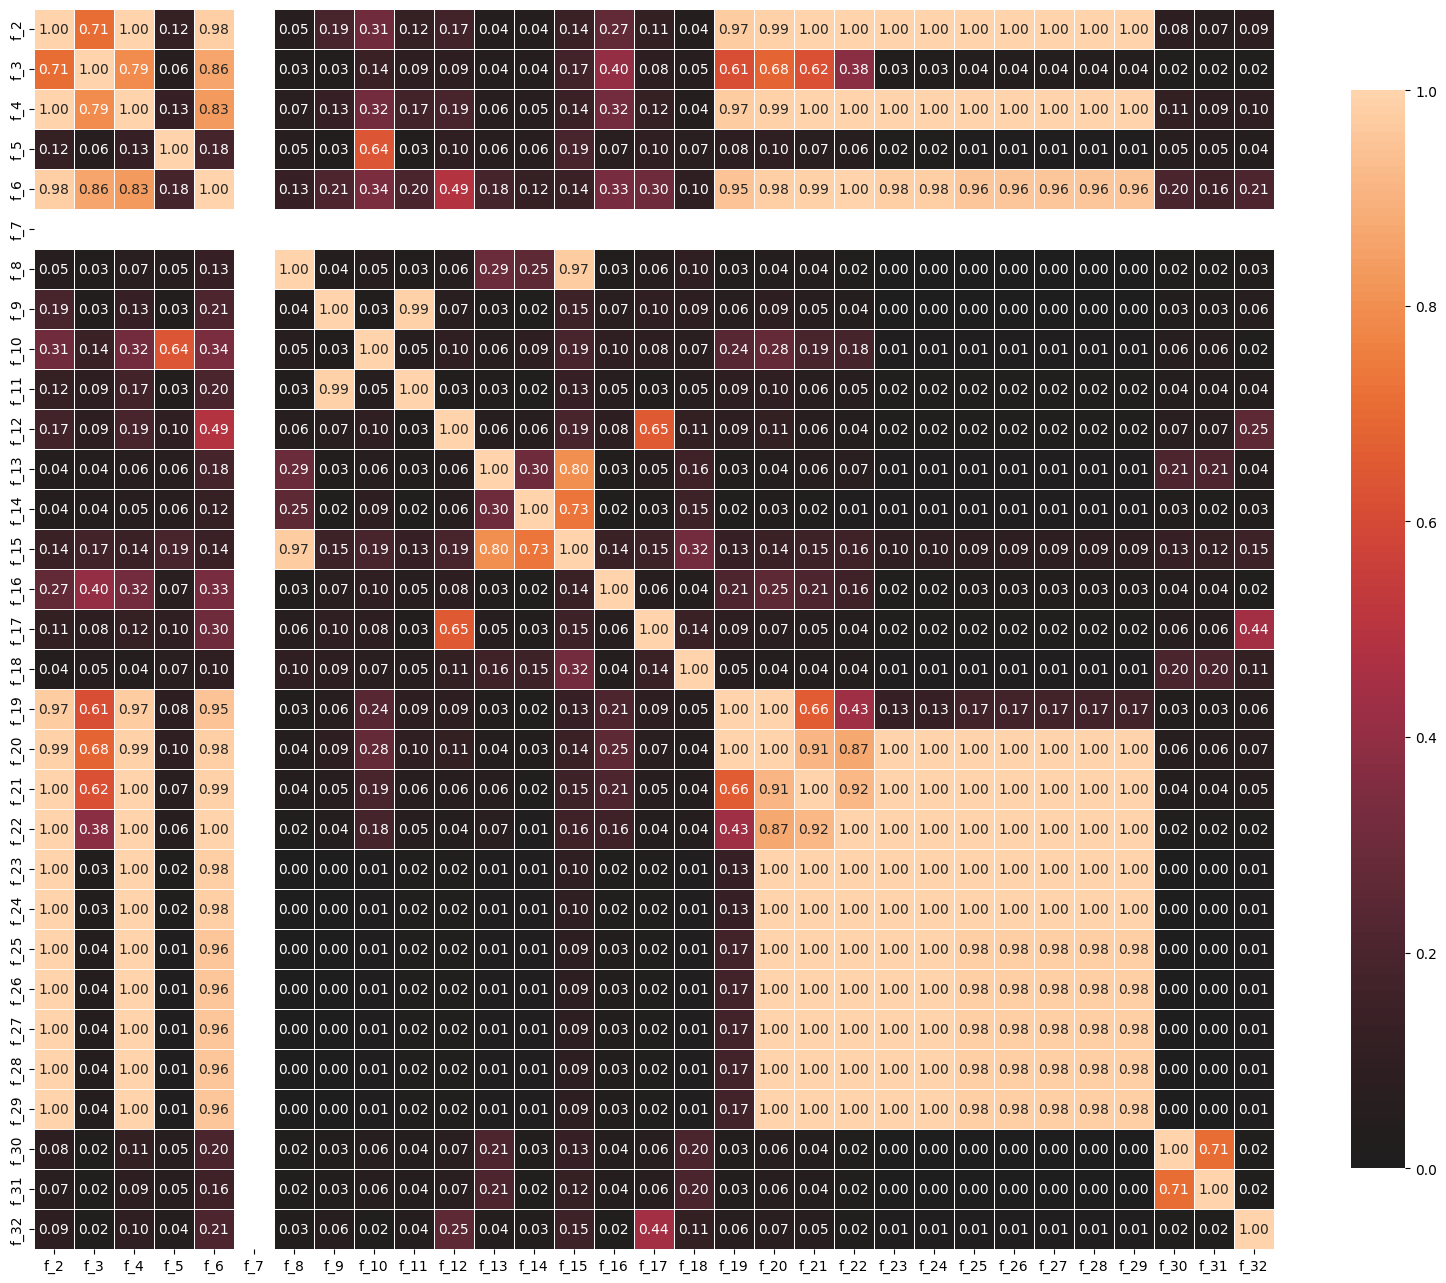

In [160]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



correlation_heatmap(cramer)


### Correlation with labels

In [20]:
# columns from f_21 to f_32
#columns = categorical_columns.append(['is_clicked', 'is_installed'])
data=df[categorical_columns]
data

f_2 f_3  f_4 f_5   f_6 f_7 f_8 f_9 f_10 f_11  ... f_25 f_26 f_27   
0         29   4  123   4  2334   0   0   6    2   22  ...    0    0    0  \
1         87   0  451   0  3625   0   4   0    0    3  ...    0    0    0   
2         87   0  451   4  3625   0   4   6    2    1  ...    0    0    0   
3         57   4  148   4  4793   0   4   4    0    8  ...    0    0    0   
4         87   0  614   0   100   0   0   5    2    1  ...    0    0    0   
...      ...  ..  ...  ..   ...  ..  ..  ..  ...  ...  ...  ...  ...  ...   
3485847   55   4   56   4  2934   0   4   5    0    1  ...    0    0    0   
3485848  117   4  235   3  4169   0   1   1    2    7  ...    0    0    0   
3485849  114   4  191   4   155   0   4   0    0   12  ...    0    0    0   
3485850  135   4  136   2  1488   0   1   5    1   20  ...    0    0    0   
3485851  135   4  218   0   649   0   4   0    2   22  ...    0    0    0   

        f_28 f_29 f_30 f_31 f_32 is_clicked is_installed  
0          0    0    2    2    3      False        False  
1          0    0    2    2    3      False        False  
2          0    0    2    2    3      False        False  
3          0    0    0    0    2      False        False  
4          0    0    0    0    3      False        False  
...      ...  ...  ...  ...  ...        ...          ...  
3485847    0    0    2    2    3      False        False  
3485848    0    0    2    2    3      False        False  
3485849    0    0    0    0    3      False        False  
3485850    0    0    2    2    0      False        False  
3485851    0    0    2    2    3       True         True  

[3485852 rows x 33 columns]

In [83]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(stat/(obs*mini))
C:\Users\sasi1\AppData\Local\Temp\ipykernel_10400\2265316550.py:9: RuntimeWarning:

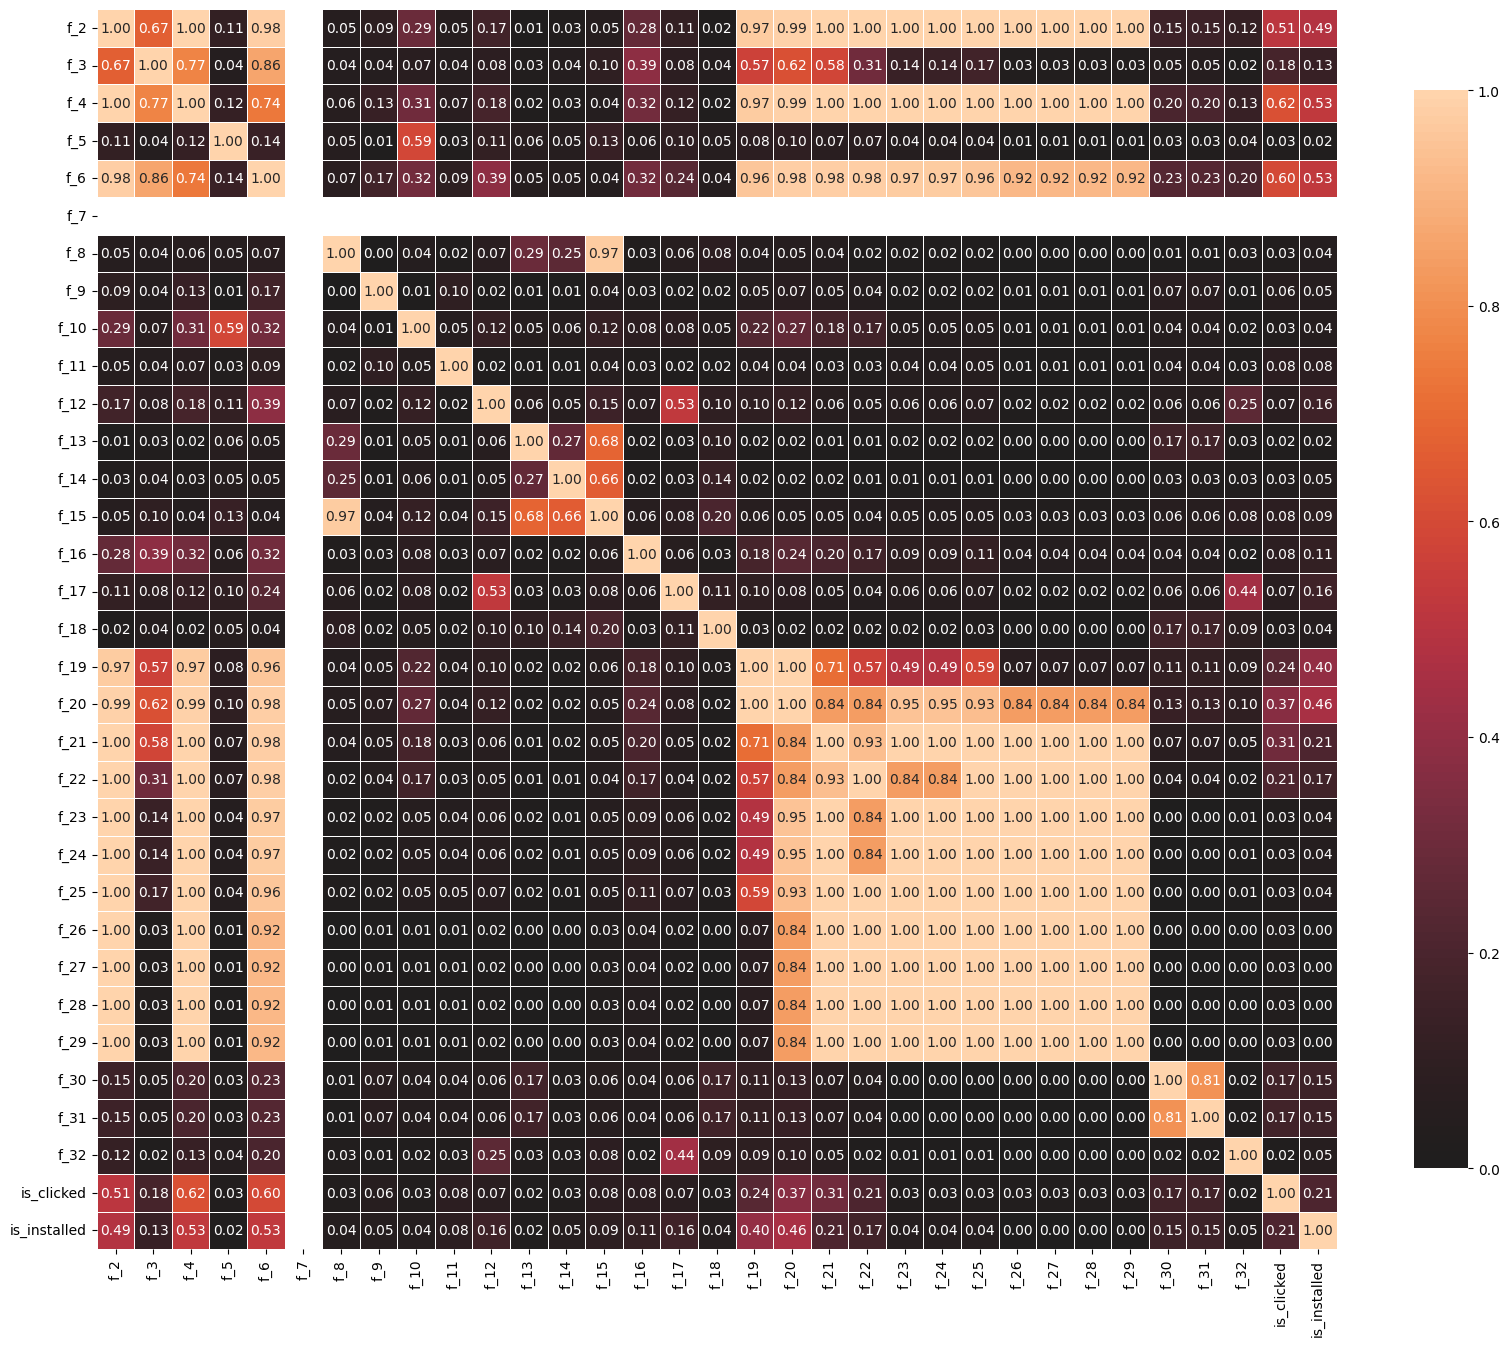

In [22]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



correlation_heatmap(cramer)


## Binaries

In [9]:
binary_columns

['f_33',
 'f_34',
 'f_35',
 'f_36',
 'f_37',
 'f_38',
 'f_39',
 'f_40',
 'f_41',
 ['is_clicked', 'is_installed']]

In [11]:
binary_columns.append('is_clicked')
binary_columns.append('is_installed')
data=df[binary_columns]
data

f_33   f_34   f_35   f_36  f_37   f_38   f_39   f_40   f_41   
0        True   True   True   True  True   True  False  False  False  \
1       False  False  False   True  True   True  False  False  False   
2       False  False  False   True  True   True  False  False  False   
3       False   True   True   True  True   True  False  False  False   
4       False  False  False   True  True   True  False  False  False   
...       ...    ...    ...    ...   ...    ...    ...    ...    ...   
115915  False  False  False  False  True  False  False  False  False   
115916  False   True  False  False  True   True  False  False  False   
115917  False   True  False   True  True   True  False  False  False   
115918  False   True   True  False  True   True  False  False  False   
115919  False  False  False  False  True  False  False  False  False   

        is_clicked  is_installed  
0            False         False  
1            False         False  
2            False         False  
3            False         False  
4            False         False  
...            ...           ...  
115915       False         False  
115916       False         False  
115917       False         False  
115918       False         False  
115919        True          True  

[3485852 rows x 11 columns]

In [12]:
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in data.columns :
  data_encoded[i]=label.fit_transform(data[i])

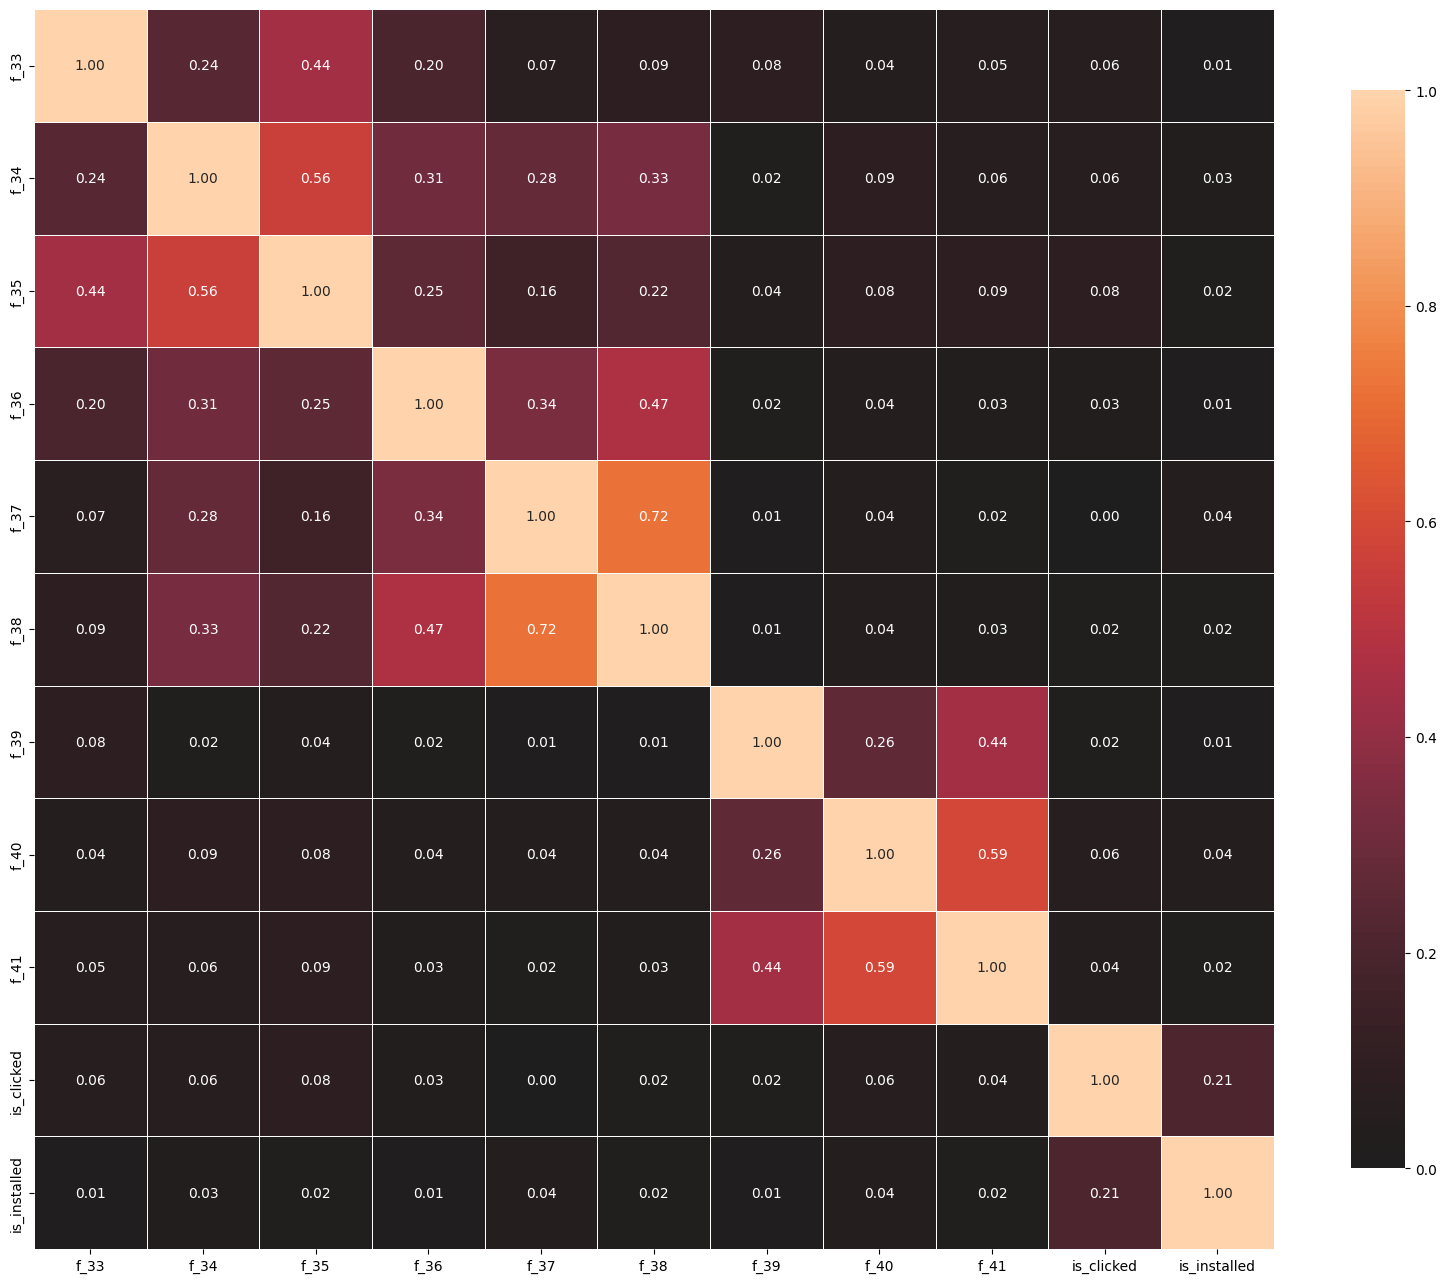

In [16]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



correlation_heatmap(cramer)

* 37 and 38

In [17]:
from treelib import Node, Tree
vals=[]
ind, _ = np.unique(df['f_37'], return_counts=True)
for i in ind:
    temp=df[df['f_37']==i]
    val=np.unique(temp['f_38'], return_counts=True)[0]
    tree = Tree()
    tree.create_node(str(i), str(i))  # No parent means its the root node
    for el in val:
        tree.create_node(el, el, parent=str(i))
    tree.show()
    #print(i, val)
    vals.append(val)
common_elements = set()
for i in range(len(vals)):
    for j in range(i+1, len(vals)):
        common = set(vals[i]).intersection(vals[j])
        common_elements |= common
print(common_elements)

False
└── False

True
├── False
└── True

{False}


In [19]:
df['f_37'].value_counts(), df['f_38'].value_counts()

(f_37
 True     3248652
 False     237200
 Name: count, dtype: Int64,
 f_38
 True     3059767
 False     426085
 Name: count, dtype: Int64)

In [61]:
print_tree(df, 'f_37', 'f_38')

False
└── False

True
├── False
└── True

{False}


* 40 and 41

In [41]:
print_tree(df,'f_40', 'f_41')

False
└── False

True
├── False
└── True

{False}


In [44]:
df['f_40'].value_counts(), df['f_41'].value_counts()

(f_40
 False    3394351
 True       91501
 Name: count, dtype: Int64,
 f_41
 False    3453865
 True       31987
 Name: count, dtype: Int64)

In [55]:
combinations_analysis(df, 'f_40', 'f_41')

f_40==True,f_41==True
shape:  31987
is_installed rate:  0.26598305561634417
f_40==False,f_41==True
shape:  0
f_40==True,f_41==False
shape:  59514
is_installed rate:  0.2551500487280304
f_40==False,f_41==False
shape:  3394351
is_installed rate:  0.17172914645539014


* 34 and 35

In [57]:
print_tree(df, 'f_34', 'f_35')

False
└── False

True
├── False
└── True

{False}


In [58]:
combinations_analysis(df, 'f_34', 'f_35')

f_34==True,f_35==True
shape:  885665
is_installed rate:  0.18813885611376763
f_34==False,f_35==True
shape:  0
f_34==True,f_35==False
shape:  942728
is_installed rate:  0.18198780560246433
f_34==False,f_35==False
shape:  1657459
is_installed rate:  0.16194005402245243


In [63]:
for f1 in binary_columns:
    for f2 in binary_columns:
        if f1!=f2:
            print("=================="+f1+', '+f2+"==================")
            print_tree(df, f1, f2)
            combinations_analysis(df, f1, f2)
            print()
            print()

==================f_33, f_34==================
False
├── False
└── True

True
└── True

{True}
f_33==True,f_34==True
shape:  213595
is_installed rate:  0.18277113228305905
f_33==False,f_34==True
shape:  1614798
is_installed rate:  0.18525784649225477
f_33==True,f_34==False
shape:  0
f_33==False,f_34==False
shape:  1657459
is_installed rate:  0.16194005402245243


==================f_33, f_35==================
False
├── False
└── True

True
└── True

{True}
f_33==True,f_35==True
shape:  213595
is_installed rate:  0.18277113228305905
f_33==False,f_35==True
shape:  672070
is_installed rate:  0.18984480783251745
f_33==True,f_35==False
shape:  0
f_33==False,f_35==False
shape:  2600187
is_installed rate:  0.16920859922767092


==================f_33, f_36==================
False
├── False
└── True

True
├── False
└── True

{False, True}
f_33==True,f_36==True
shape:  209990
is_installed rate:  0.1825563122053431
f_33==False,f_36==True
shape:  1919390
is_installed rate:  0.1693043102235606
f_3

In [18]:
print_tree(df, 'f_33', 'f_35')

False
├── False
└── True

True
└── True

{True}


In [19]:
print_tree(df, 'f_33', 'f_34')

False
├── False
└── True

True
└── True

{True}


In [20]:
print_tree(df, 'f_34', 'f_35')

False
└── False

True
├── False
└── True

{False}


In [32]:
#create a new feature f_345 that is 0 if f_34 and f_35 are both False, 1 if f_34 is True and f_35 is False, 2 if f_34 and f_35 are both True
df['f_345']=0
df.loc[(df['f_34']==True) & (df['f_35']==False), 'f_345']=1
df.loc[(df['f_34']==True) & (df['f_35']==True), 'f_345']=2
df['f_345'].value_counts()

f_345
0    1657459
1     942728
2     885665
Name: count, dtype: int64

In [66]:
combinations_analysis(df, 'f_34', 'f_33')

f_34==True,f_33==True
shape:  213595
is_installed rate:  0.18277113228305905
f_34==False,f_33==True
shape:  0
f_34==True,f_33==False
shape:  1614798
is_installed rate:  0.18525784649225477
f_34==False,f_33==False
shape:  1657459
is_installed rate:  0.16194005402245243


In [22]:
df['f_343']=0
df.loc[(df['f_34']==True) & (df['f_33']==False), 'f_343']=1
df.loc[(df['f_34']==True) & (df['f_33']==True), 'f_343']=2
df['f_343'].value_counts()

f_343
0    1657459
1    1614798
2     213595
Name: count, dtype: int64

In [33]:
df['f_334']=0
df.loc[(df['f_33']==False) & (df['f_34']==True), 'f_334']=1
df.loc[(df['f_33']==True) & (df['f_34']==True), 'f_334']=2
df['f_334'].value_counts()

f_334
0    1657459
1    1614798
2     213595
Name: count, dtype: int64

In [25]:
df['f_357']=0
df.loc[(df['f_35']==False) & (df['f_37']==True), 'f_357']=1
df.loc[(df['f_35']==True) & (df['f_37']==True), 'f_357']=2
df['f_357'].value_counts()

f_357
1    2362987
2     885665
0     237200
Name: count, dtype: int64

In [24]:
print_tree(df, 'f_334', 'f_345')

0
└── 0

1
├── 1
└── 2

2
└── 2

{2}


In [26]:
print_tree(df, 'f_345', 'f_357')

0
├── 0
└── 1

1
└── 1

2
└── 2

{1}


In [27]:
print_tree(df, 'f_334', 'f_357')

0
├── 0
└── 1

1
├── 1
└── 2

2
└── 2

{1, 2}


In [34]:
df['f_3345']=0
df.loc[(df['f_334']==1) & (df['f_345']==1), 'f_3345']=1
df.loc[(df['f_334']==1) & (df['f_345']==2), 'f_3345']=2
df.loc[(df['f_334']==2) & (df['f_345']==2), 'f_3345']=3
df['f_3345'].value_counts()

f_3345
0    1657459
1     942728
2     672070
3     213595
Name: count, dtype: int64

In [35]:
df['f_3457']=0
df.loc[(df['f_345']==0) & (df['f_357']==1), 'f_3457']=1
df.loc[(df['f_345']==1) & (df['f_357']==1), 'f_3457']=2
df.loc[(df['f_345']==2) & (df['f_357']==2), 'f_3457']=3
df['f_3457'].value_counts()

f_3457
1    1420259
2     942728
3     885665
0     237200
Name: count, dtype: int64

In [36]:
print_tree(df, 'f_3345', 'f_3457')

0
├── 0
└── 1

1
└── 2

2
└── 3

3
└── 3

{3}


In [38]:
df['f_33457']=0
df.loc[(df['f_3345']==0) & (df['f_3457']==1), 'f_33457']=1
df.loc[(df['f_3345']==1) & (df['f_3457']==2), 'f_33457']=2
df.loc[(df['f_3345']==2) & (df['f_3457']==3), 'f_33457']=3
df.loc[(df['f_3345']==3) & (df['f_3457']==3), 'f_33457']=4
df['f_33457'].value_counts()

f_33457
1    1420259
2     942728
3     672070
0     237200
4     213595
Name: count, dtype: int64

In [40]:
df['f_3940']=0
df.loc[(df['f_39']==False) & (df['f_40']==True), 'f_3940']=1
df.loc[(df['f_39']==True) & (df['f_40']==True), 'f_3940']=2
df['f_3940'].value_counts()

f_3940
0    3394351
1      85193
2       6308
Name: count, dtype: int64

In [41]:
df['f_4041']=0
df.loc[(df['f_40']==True) & (df['f_41']==False), 'f_4041']=1
df.loc[(df['f_40']==True) & (df['f_41']==True), 'f_4041']=2
df['f_4041'].value_counts()

f_4041
0    3394351
1      59514
2      31987
Name: count, dtype: int64

In [42]:
print_tree(df, 'f_3940', 'f_4041')

0
└── 0

1
├── 1
└── 2

2
└── 2

{2}


In [44]:
df['f_394041']=0
df.loc[(df['f_3940']==1) & (df['f_4041']==1), 'f_394041']=1
df.loc[(df['f_3940']==1) & (df['f_4041']==2), 'f_394041']=2
df.loc[(df['f_3940']==2) & (df['f_4041']==2), 'f_394041']=3
df['f_394041'].value_counts()

f_394041
0    3394351
1      59514
2      25679
3       6308
Name: count, dtype: int64

## More on numericals

In [7]:
numerical_columns.append('is_clicked')
numerical_columns.append('is_installed')
numerical_columns

['f_42',
 'f_43',
 'f_44',
 'f_45',
 'f_46',
 'f_47',
 'f_48',
 'f_49',
 'f_50',
 'f_51',
 'f_52',
 'f_53',
 'f_54',
 'f_55',
 'f_56',
 'f_57',
 'f_58',
 'f_59',
 'f_60',
 'f_61',
 'f_62',
 'f_63',
 'f_64',
 'f_65',
 'f_66',
 'f_67',
 'f_68',
 'f_69',
 'f_70',
 'f_71',
 'f_72',
 'f_73',
 'f_74',
 'f_75',
 'f_76',
 'f_77',
 'f_78',
 'f_79',
 'is_clicked',
 'is_installed']

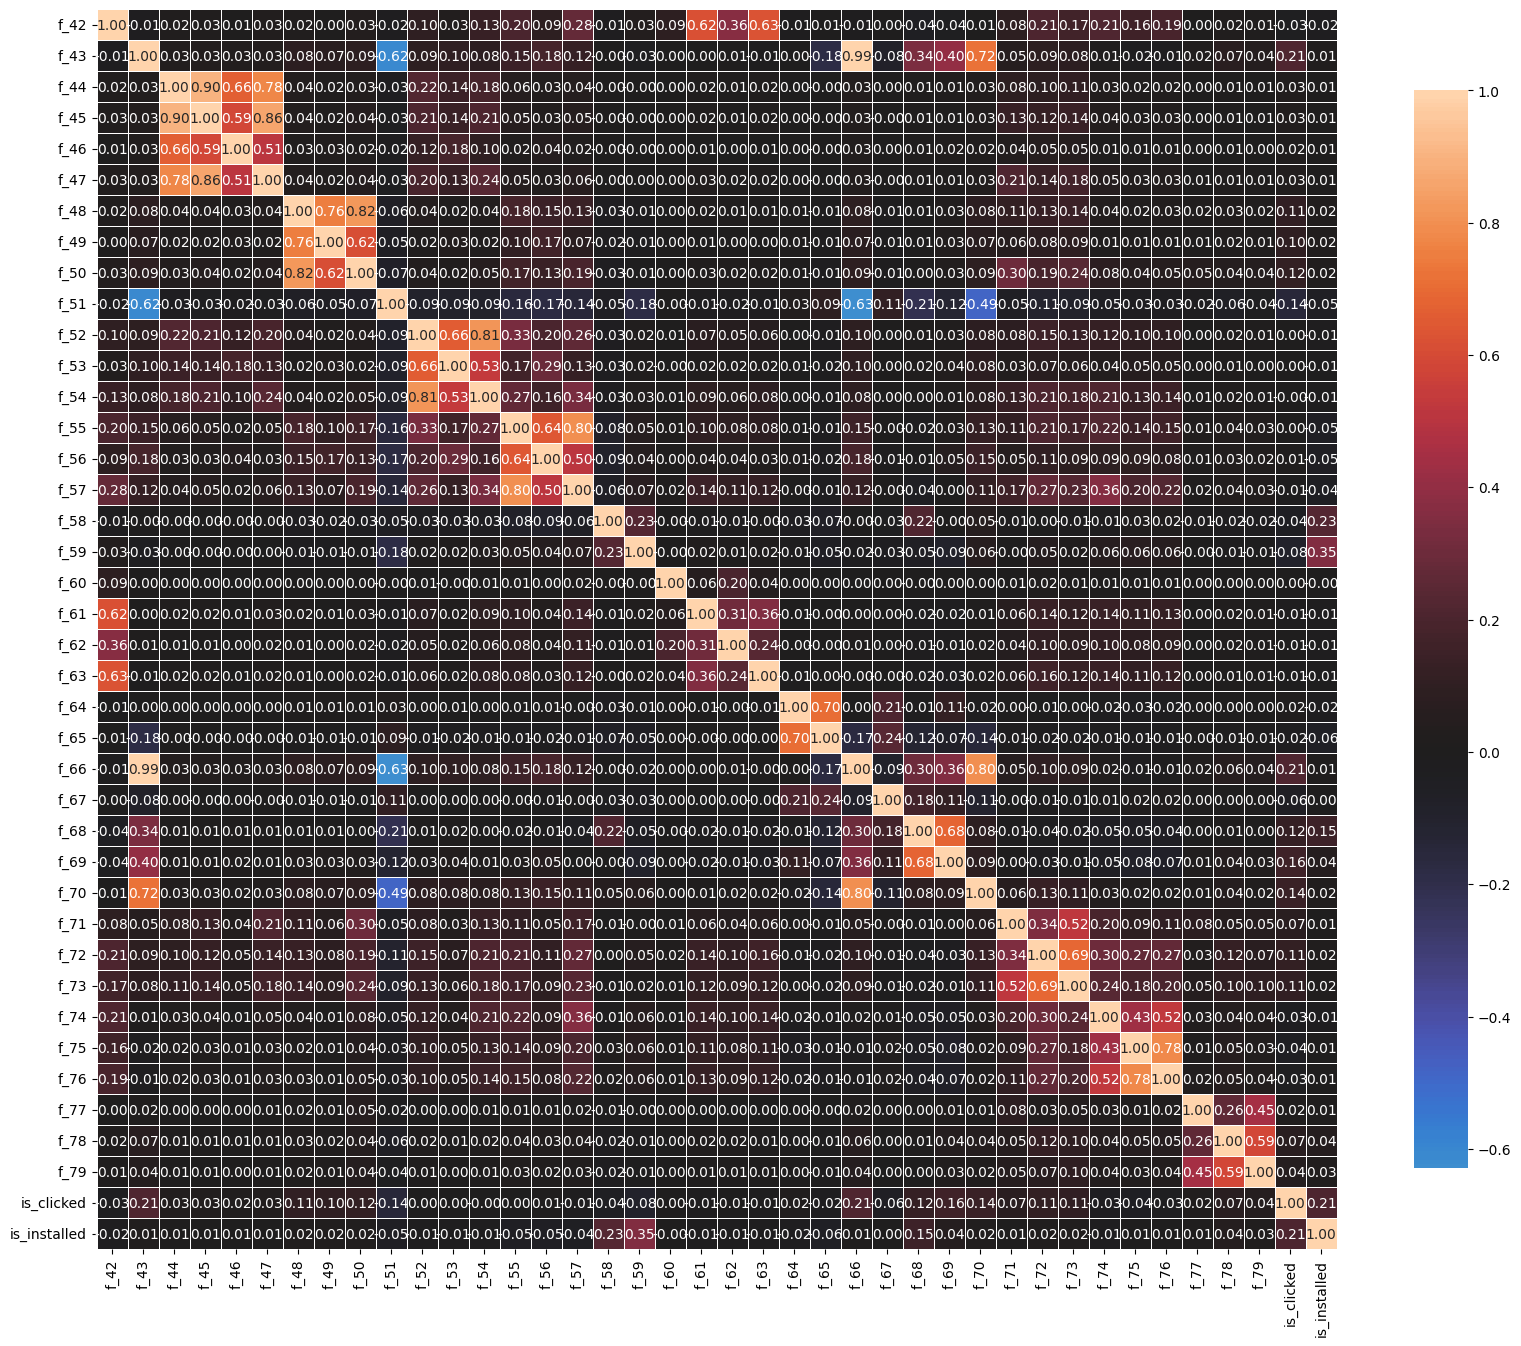

In [10]:
correlation_heatmap(df[numerical_columns].corr())

In [11]:
vals=[]
ind, _ = np.unique(df['f_26'], return_counts=True)
for i in ind:
    temp=df[df['f_26']==i]
    val=np.unique(temp['f_27'], return_counts=True)[0]
    print(i, val)
    vals.append(val)
#find common elements between all the lists
common_elements = set(vals[0]).intersection(*vals)
print(common_elements)

0 [0]
1 [1]
set()


In [19]:
columns=['f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29']
for column1 in columns:
    ind, _ = np.unique(df[column1], return_counts=True)
    for column2 in columns:
        if column1!=column2:
            print(column1, column2)
            vals=[]
            for i in ind:
                temp=df[df[column1]==i]
                val=np.unique(temp[column2], return_counts=True)[0]
                print(i, val)
                vals.append(val)

            # find common elements between any two or more lists
            common_elements = set()
            for i in range(len(vals)):
                for j in range(i+1, len(vals)):
                    common = set(vals[i]).intersection(vals[j])
                    common_elements |= common

            print(common_elements)
            print()

f_23 f_24
0 [0]
1 [3]
2 [2]
3 [1]
set()

f_23 f_25
0 [0]
1 [0]
2 [1]
3 [2]
{0}

f_23 f_26
0 [0]
1 [0]
2 [0]
3 [1]
{0}

f_23 f_27
0 [0]
1 [0]
2 [0]
3 [1]
{0}

f_23 f_28
0 [0]
1 [0]
2 [0]
3 [1]
{0}

f_23 f_29
0 [0]
1 [0]
2 [0]
3 [1]
{0}

f_24 f_23
0 [0]
1 [3]
2 [2]
3 [1]
set()

f_24 f_25
0 [0]
1 [2]
2 [1]
3 [0]
{0}

f_24 f_26
0 [0]
1 [1]
2 [0]
3 [0]
{0}

f_24 f_27
0 [0]
1 [1]
2 [0]
3 [0]
{0}

f_24 f_28
0 [0]
1 [1]
2 [0]
3 [0]
{0}

f_24 f_29
0 [0]
1 [1]
2 [0]
3 [0]
{0}

f_25 f_23
0 [0 1]
1 [2]
2 [3]
set()

f_25 f_24
0 [0 3]
1 [2]
2 [1]
set()

f_25 f_26
0 [0]
1 [0]
2 [1]
{0}

f_25 f_27
0 [0]
1 [0]
2 [1]
{0}

f_25 f_28
0 [0]
1 [0]
2 [1]
{0}

f_25 f_29
0 [0]
1 [0]
2 [1]
{0}

f_26 f_23
0 [0 1 2]
1 [3]
set()

f_26 f_24
0 [0 2 3]
1 [1]
set()

f_26 f_25
0 [0 1]
1 [2]
set()

f_26 f_27
0 [0]
1 [1]
set()

f_26 f_28
0 [0]
1 [1]
set()

f_26 f_29
0 [0]
1 [1]
set()

f_27 f_23
0 [0 1 2]
1 [3]
set()

f_27 f_24
0 [0 2 3]
1 [1]
set()

f_27 f_25
0 [0 1]
1 [2]
set()

f_27 f_26
0 [0]
1 [1]
set()

f_27 f_28
0 

In [20]:
columns=['f_26', 'f_30', 'f_31']
for column1 in columns:
    ind, _ = np.unique(df[column1], return_counts=True)
    for column2 in columns:
        if column1!=column2:
            print(column1, column2)
            vals=[]
            for i in ind:
                temp=df[df[column1]==i]
                val=np.unique(temp[column2], return_counts=True)[0]
                print(i, val)
                vals.append(val)

            # find common elements between any two or more lists
            common_elements = set()
            for i in range(len(vals)):
                for j in range(i+1, len(vals)):
                    common = set(vals[i]).intersection(vals[j])
                    common_elements |= common

            print(common_elements)
            print()

f_26 f_30
0 [0 1 2]
1 [0 2]
{0, 2}

f_26 f_31
0 [0 1 2]
1 [0 2]
{0, 2}

f_30 f_26
0 [0 1]
1 [0]
2 [0 1]
{0, 1}

f_30 f_31
0 [0 1]
1 [0 1]
2 [2]
{0, 1}

f_31 f_26
0 [0 1]
1 [0]
2 [0 1]
{0, 1}

f_31 f_30
0 [0 1]
1 [0 1]
2 [2]
{0, 1}



In [21]:
columns=['f_19', 'f_20', 'f_21', 'f_22','f_23', 'f_26']
for column1 in columns:
    ind, _ = np.unique(df[column1], return_counts=True)
    for column2 in columns:
        if column1!=column2:
            print(column1, column2)
            vals=[]
            for i in ind:
                temp=df[df[column1]==i]
                val=np.unique(temp[column2], return_counts=True)[0]
                print(i, val)
                vals.append(val)

            # find common elements between any two or more lists
            common_elements = set()
            for i in range(len(vals)):
                for j in range(i+1, len(vals)):
                    common = set(vals[i]).intersection(vals[j])
                    common_elements |= common

            print(common_elements)
            print()

f_19 f_20
0 [0]
1 [44 49 52]
2 [50]
3 [40]
4 [12 55]
5 [14 51 54]
6 [10 11 16 21 24 28 41]
7 [13 15 17]
8 [19 23 26 29]
9 [18 43 45]
10 [25 31 33 36 39]
11 [34]
12 [2 3 4 6]
13 [ 7 20 27 46 47]
14 [1]
15 [22 30 37]
16 [35 38]
17 [ 5  8  9 42 56]
18 [32]
set()

f_19 f_21
0 [0]
1 [ 0 31]
2 [30]
3 [0]
4 [ 0 25 27 34]
5 [0]
6 [ 0  8  9 13 15 20 28]
7 [ 0 10 17]
8 [ 0 14 18]
9 [ 0 21 23 29]
10 [0]
11 [0]
12 [0 2 3]
13 [ 0 12 19 33]
14 [1]
15 [ 0 11 16]
16 [ 0 24]
17 [ 0  4  5  6  7 26]
18 [22]
{0}

f_19 f_22
0 [0]
1 [ 0 25]
2 [1]
3 [0]
4 [ 0 13 22]
5 [0]
6 [ 0  8 14 21]
7 [0 7]
8 [ 0 11 12 16]
9 [ 0 10 15 19]
10 [0]
11 [0]
12 [0 3]
13 [ 0 18 23 24]
14 [2]
15 [ 0 17]
16 [ 0 20]
17 [0 4 5]
18 [0]
{0}

f_19 f_23
0 [0]
1 [0]
2 [0]
3 [0]
4 [0]
5 [0]
6 [0 1]
7 [0]
8 [0 2]
9 [0]
10 [0]
11 [0]
12 [0]
13 [0 3]
14 [0]
15 [0]
16 [0]
17 [0]
18 [0]
{0}

f_19 f_26
0 [0]
1 [0]
2 [0]
3 [0]
4 [0]
5 [0]
6 [0]
7 [0]
8 [0]
9 [0]
10 [0]
11 [0]
12 [0]
13 [0 1]
14 [0]
15 [0]
16 [0]
17 [0]
18 [0]
{0}

f_20 f_19
0 

In [65]:
vals=[]
ind, _ = np.unique(df['f_19'], return_counts=True)
for i in ind:
    temp=df[df['f_19']==i]
    val=np.unique(temp['f_20'], return_counts=True)[0]
    tree = Tree()
    tree.create_node(str(i), str(i))  # No parent means its the root node
    for el in val:
        tree.create_node(el, el, parent=str(i))
    tree.show()
    #print(i, val)
    vals.append(val)
#find common elements between all the lists
common_elements = set(vals[0]).intersection(*vals)
print(common_elements)


0
└── 0

1
├── 44
├── 49
└── 52

2
└── 50

3
└── 40

4
├── 12
└── 55

5
├── 14
├── 51
└── 54

6
├── 10
├── 11
├── 16
├── 21
├── 24
├── 28
└── 41

7
├── 13
├── 15
└── 17

8
├── 19
├── 23
├── 26
└── 29

9
├── 18
├── 43
└── 45

10
├── 25
├── 31
├── 33
├── 36
└── 39

11
└── 34

12
├── 2
├── 3
├── 4
└── 6

13
├── 7
├── 20
├── 27
├── 46
└── 47

14
└── 1

15
├── 22
├── 30
└── 37

16
├── 35
└── 38

17
├── 5
├── 8
├── 9
├── 42
└── 56

18
└── 32

set()


In [89]:
from treelib import Node, Tree
vals=[]
ind, _ = np.unique(df['f_22'], return_counts=True)
for i in ind:
    temp=df[df['f_22']==i]
    val=np.unique(temp['f_2'], return_counts=True)[0]
    tree = Tree()
    tree.create_node(str(i), str(i))  # No parent means its the root node
    for el in val:
        tree.create_node(el, el, parent=str(i))
    tree.show()
    #print(i, val)
    vals.append(val)
common_elements = set()
for i in range(len(vals)):
    for j in range(i+1, len(vals)):
        common = set(vals[i]).intersection(vals[j])
        common_elements |= common
print(common_elements)

0
├── 1
├── 2
├── 3
├── 5
├── 6
├── 7
├── 8
├── 9
├── 11
├── 12
├── 13
├── 14
├── 15
├── 16
├── 17
├── 18
├── 19
├── 20
├── 21
├── 22
├── 23
├── 24
├── 25
├── 26
├── 28
├── 29
├── 30
├── 32
├── 33
├── 34
├── 35
├── 37
├── 38
├── 39
├── 40
├── 41
├── 43
├── 46
├── 49
├── 50
├── 51
├── 52
├── 53
├── 54
├── 55
├── 56
├── 57
├── 58
├── 59
├── 60
├── 62
├── 64
├── 65
├── 66
├── 67
├── 69
├── 70
├── 71
├── 73
├── 74
├── 75
├── 77
├── 78
├── 79
├── 80
├── 81
├── 82
├── 83
├── 84
├── 86
├── 87
├── 88
├── 89
├── 90
├── 91
├── 92
├── 93
├── 95
├── 96
├── 97
├── 98
├── 99
├── 100
├── 102
├── 103
├── 104
├── 105
├── 107
├── 111
├── 112
├── 113
├── 114
├── 116
├── 117
├── 118
├── 119
├── 120
├── 121
├── 122
├── 123
├── 124
├── 126
├── 128
├── 129
├── 130
├── 131
├── 133
├── 135
├── 136
├── 137
└── 138

1
└── 48

2
└── 72

3
└── 132

4
└── 108

5
└── 110

7
└── 26

8
├── 42
├── 109
└── 134

10
└── 131

11
└── 101

12
└── 4

13
└── 85

14
├── 36
├── 68
└── 115

15
└── 63

16
└── 76

17
└── 0

18
└── 

In [92]:
df.loc[(df['f_22']==0)&(df['f_2']==131), ['is_clicked', 'is_installed']]

is_clicked  is_installed
1075033        True         False
2165937        True         False

In [59]:
df.loc[(df['f_23']!=0), ['is_clicked', 'is_installed']]

is_clicked  is_installed
38            False         False
40            False         False
46            False         False
72             True         False
82            False         False
...             ...           ...
3485780       False         False
3485785       False         False
3485795       False         False
3485801       False         False
3485837        True         False

[225558 rows x 2 columns]

In [55]:
f_26.loc[f_26['is_installed']==1].shape[0]/f_26.shape[0]

0.12299465240641712

## f_30 and f_31

In [9]:
df['f_30'].value_counts()

f_30
0.0    1816733
1.0       2151
Name: count, dtype: int64

In [10]:
df['f_31'].value_counts()

f_31
0.0    1817977
1.0        907
Name: count, dtype: int64

In [17]:
df.loc[(df['f_30']==1)&(df['f_31']==1), ['is_clicked', 'is_installed']]

is_clicked  is_installed
99            True         False
3564          True         False
22246         True         False
31003         True          True
35778         True         False
...            ...           ...
106199        True         False
107946        True         False
108407        True         False
109759        True         False
112237        True         False

[794 rows x 2 columns]

In [18]:
from treelib import Node, Tree
vals=[]
ind, _ = np.unique(df['f_30'], return_counts=True)
for i in ind:
    temp=df[df['f_30']==i]
    val=np.unique(temp['f_31'], return_counts=True)[0]
    tree = Tree()
    tree.create_node(str(i), str(i))  # No parent means its the root node
    for el in val:
        tree.create_node(el, el, parent=str(i))
    tree.show()
    #print(i, val)
    vals.append(val)
common_elements = set()
for i in range(len(vals)):
    for j in range(i+1, len(vals)):
        common = set(vals[i]).intersection(vals[j])
        common_elements |= common
print(common_elements)

0.0
├── 0.0
└── 1.0

1.0
├── 0.0
└── 1.0

nan

{0.0, 1.0}


* 43 and 66

In [19]:
df['f_43'].value_counts()

f_43
0.000431    82276
0.000194    75960
0.000240    74668
0.001049    65982
0.000466    57370
            ...  
0.501893        1
0.625808        1
1.507613        1
0.123402        1
1.045254        1
Name: count, Length: 1721, dtype: int64

In [20]:
df['f_66'].value_counts()

f_66
0.000386    82276
0.000162    75960
0.000199    74668
0.000873    65982
0.000447    57370
            ...  
0.466565        1
1.809671        1
0.568941        1
1.483265        1
0.205282        1
Name: count, Length: 1722, dtype: int64

In [21]:
from treelib import Node, Tree
vals=[]
ind, _ = np.unique(df['f_43'], return_counts=True)
for i in ind:
    temp=df[df['f_43']==i]
    val=np.unique(temp['f_66'], return_counts=True)[0]
    tree = Tree()
    tree.create_node(str(i), str(i))  # No parent means its the root node
    for el in val:
        tree.create_node(el, el, parent=str(i))
    tree.show()
    #print(i, val)
    vals.append(val)
common_elements = set()
for i in range(len(vals)):
    for j in range(i+1, len(vals)):
        common = set(vals[i]).intersection(vals[j])
        common_elements |= common
print(common_elements)

0.0
├── 0.0
└── 0.3354480266571045

6.017448e-05
└── 5.005053390050307e-05

0.00013826069
└── 0.00015333236660808325

0.0001455517
└── 0.00012106362555641681

0.00018705343
└── 0.00015558296581730247

0.00019429851
└── 0.00016160911764018238

0.00020883065
└── 0.00017369631677865982

0.00023977738
└── 0.00019943647203035653

0.0002402964
└── 0.00019986816914752126

0.00025077944
└── 0.00020858751668129116

0.000264611
└── 0.00022009202803019434

0.0002905966
└── 0.0002417057112324983

0.00043076833
└── 0.00038585561560466886

0.00043308176
└── 0.00036021872074343264

0.00046616237
└── 0.000447385071311146

0.00062873
└── 0.0005229504895396531

0.000662207
└── 0.0005507952300831676

0.000739571
└── 0.0006151432171463966

0.0007527682
└── 0.0006456863484345376

0.0008007653
└── 0.0006916589918546379

0.0010491984
└── 0.0008726780069991946

0.0017373969
└── 0.0014450917951762676

0.0020708146
└── 0.001722414162941277

0.123402365
└── 0.20528151094913483

0.18966302
└── 0.2287425845861435


In [42]:
df.loc[df['f_30'].isna()].shape[0]

1666968

In [44]:
df.loc[df['f_43'].isna()]

f_0  f_1    f_2    f_3    f_4    f_5    f_6    f_7    f_8    f_9   
34      2153755   55  14963   7779   7041  15908  12490  27941  18800  23218  \
74      1843576   53   3346  22294   6767  29304  11590  27941  18800  14659   
79      1844396   59  17758  22294   7637  25604  21534  27941  18800   6675   
83      1845438   57   9007   7152   9496  21545  31378  27941  19606  21533   
87       483136   48  14963  22294   5383  19072  10317  27941  18800  23218   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
115784  1367997   50  17758  22294  11299  25604  18137  27941  19203  21533   
115793  1370838   52  27426  22294  24261  21545  12410  27941  19203   6675   
115835  2588476   65  27426  22294  31654  25604   1239  27941  21218  31372   
115850  1778587   45   3346  22294   6767  25604  30306  27941  19203   6675   
115895  2059294   52  27426  22294   3987  21545  28501  27941  21218   6675   

        ...      f_72      f_73      f_74      f_75      f_76 f_77 f_78 f_79   
34      ...  5.711215  3.997850  0.038564  1.156922  0.269948  0.0  0.0  0.0  \
74      ...  0.571121  0.000000  0.115692  1.156922  0.269948  0.0  0.0  0.0   
79      ...  2.855607  0.000000  0.000000  1.156922  0.269948  0.0  0.0  0.0   
83      ...  0.000000  0.000000  0.038564  1.156922  0.077128  0.0  0.0  0.0   
87      ...  0.571121  0.000000  0.115692  1.156922  0.269948  0.0  0.0  0.0   
...     ...       ...       ...       ...       ...       ...  ...  ...  ...   
115784  ...  2.284486  0.571121  0.115692  1.156922  0.269948  0.0  0.0  0.0   
115793  ...  0.000000  0.000000  0.115692  1.156922  0.269948  0.0  0.0  0.0   
115835  ...  0.000000  0.000000  0.115692  1.156922  0.269948  0.0  0.0  0.0   
115850  ...  0.571121  0.000000  0.077128  1.156922  0.077128  0.0  0.0  0.0   
115895  ...  0.000000  0.000000  0.000000  0.269948  0.000000  0.0  0.0  0.0   

       is_clicked is_installed  
34           True        False  
74          False        False  
79          False        False  
83           True        False  
87          False        False  
...           ...          ...  
115784      False        False  
115793       True        False  
115835       True        False  
115850      False        False  
115895       True        False  

[181427 rows x 82 columns]

In [47]:
df.loc[(df['f_30'].isna())&(df['f_31'].isna())&(df['f_43'].isna())&(df['is_installed']==0)]

f_0  f_1    f_2    f_3    f_4    f_5    f_6    f_7    f_8    f_9   
79      1844396   59  17758  22294   7637  25604  21534  27941  18800   6675  \
87       483136   48  14963  22294   5383  19072  10317  27941  18800  23218   
102     1276901   49   3346  22294  14088  15908  26482  27941  21621    869   
127     1283718   55   3346  22294   5579  21545   6277  27941  19203  23218   
199     1563033   62  27426   7779  25753  15908  29204  27941  19203  23218   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
115705  1623190   46  27426  22294  32095  25604  16299  27941  19203  14659   
115744   179968   45   3346  22294  14088  25604    256  27941  19203   6675   
115784  1367997   50  17758  22294  11299  25604  18137  27941  19203  21533   
115850  1778587   45   3346  22294   6767  25604  30306  27941  19203   6675   
115895  2059294   52  27426  22294   3987  21545  28501  27941  21218   6675   

        ...      f_72      f_73      f_74      f_75      f_76 f_77 f_78 f_79   
79      ...  2.855607  0.000000  0.000000  1.156922  0.269948  0.0  0.0  0.0  \
87      ...  0.571121  0.000000  0.115692  1.156922  0.269948  0.0  0.0  0.0   
102     ...  1.142243  0.571121  0.115692  1.156922  0.269948  0.0  0.0  0.0   
127     ...  0.000000  0.000000  0.000000  1.156922  0.269948  0.0  0.0  0.0   
199     ...  0.000000  0.000000  0.000000  1.156922  0.269948  0.0  0.0  0.0   
...     ...       ...       ...       ...       ...       ...  ...  ...  ...   
115705  ...  0.000000  0.000000  0.115692  0.347077  0.269948  0.0  0.0  0.0   
115744  ...  0.000000  0.000000  0.115692  1.156922  0.269948  0.0  0.0  0.0   
115784  ...  2.284486  0.571121  0.115692  1.156922  0.269948  0.0  0.0  0.0   
115850  ...  0.571121  0.000000  0.077128  1.156922  0.077128  0.0  0.0  0.0   
115895  ...  0.000000  0.000000  0.000000  0.269948  0.000000  0.0  0.0  0.0   

       is_clicked is_installed  
79          False        False  
87          False        False  
102         False        False  
127         False        False  
199         False        False  
...           ...          ...  
115705      False        False  
115744      False        False  
115784      False        False  
115850      False        False  
115895       True        False  

[84848 rows x 82 columns]

In [37]:
df.loc[(df['f_33']==1)&(df['is_installed']==True), ['is_clicked', 'is_installed']]

is_clicked  is_installed
14           False          True
168          False          True
210          False          True
225           True          True
232           True          True
...            ...           ...
115735       False          True
115767       False          True
115879        True          True
115884       False          True
115908        True          True

[39039 rows x 2 columns]

In [12]:
print_tree(df, 'f_66', 'f_67')

0.0
├── 0.0
├── 6.060873985290527
├── 6.442938327789307
├── 6.474404811859131
├── 6.5012898445129395
├── 6.770833492279053
├── 7.268687725067139
├── 7.346225261688232
├── 7.350194931030273
├── 7.4970221519470215
├── 7.608250617980957
├── 7.771193504333496
├── 8.148097038269043
└── 8.25433349609375

5.0050534e-05
└── 8.14645767211914

0.000121063626
└── 8.223331451416016

0.00015333237
└── 8.083849906921387

0.00015558297
└── 8.269832611083984

0.00016160912
└── 8.231184005737305

0.00017369632
└── 8.305948257446289

0.00019943647
└── 8.169678688049316

0.00019986817
└── 8.275103569030762

0.00020858752
└── 8.238880157470703

0.00022009203
└── 8.121942520141602

0.00024170571
└── 8.455817222595215

0.00036021872
└── 8.09800910949707

0.00038585562
└── 8.016599655151367

0.00044738507
└── 8.26571273803711

0.0005229505
└── 8.149800300598145

0.00055079523
└── 8.192792892456055

0.0006151432
└── 8.126352310180664

0.00064568635
└── 8.104084014892578

0.000691659
└── 8.190964698791504

0.0

In [14]:
print_tree(df, 'f_69', 'f_68')

0.0
└── 0.0

0.31992593
└── 0.14556573331356049

0.44426116
└── 0.20031534135341644

0.45256135
└── 0.20078779757022858

0.48880434
└── 0.19962294399738312

0.49498627
└── 0.24891376495361328

0.674768
└── 0.31632542610168457

0.68097246
└── 0.29504528641700745

0.689211
└── 0.28560671210289

0.75051546
└── 0.18428073823451996

0.9465231
└── 0.2090165615081787

1.1198909
└── 0.5247374176979065

1.1766031
└── 0.9191403985023499

1.3127061
└── 0.3294360041618347

1.4113842
└── 0.3453722298145294

1.4175969
└── 0.29848477244377136

1.6467559
└── 1.089363694190979

1.7127233
└── 1.0584176778793335

1.7198787
└── 0.3026181757450104

1.7638885
└── 1.043572187423706

1.8273711
└── 0.33153197169303894

2.0517852
└── 0.42795252799987793

2.2208192
└── 1.1062602996826172

2.2654233
└── 0.989676833152771

2.2772913
└── 1.4489257335662842

2.2931716
└── 0.4805755615234375

2.4364948
└── 0.30405154824256897

2.4673364
└── 0.49646466970443726

2.4751694
└── 0.44433748722076416

2.5911987
└── 1.33387

* 44 - 45

In [35]:
from utils.notebook_utils import remove_counter_costant

In [36]:
df=remove_counter_costant(df)

In [37]:
print_tree(df, 'f_45', 'f_44')

0.0
└── 0.0

1.0
├── 0.0
└── 1.0

2.0
├── 0.0
├── 1.0
└── 2.0

3.0
├── 0.0
├── 1.0
├── 2.0
└── 3.0

4.0
├── 0.0
├── 1.0
├── 2.0
├── 3.0
└── 4.0

5.0
├── 0.0
├── 1.0
├── 2.0
├── 3.0
├── 4.0
└── 5.0

6.0
├── 0.0
├── 1.0
├── 2.0
├── 3.0
├── 4.0
├── 5.0
└── 6.0

7.0
├── 0.0
├── 1.0
├── 2.0
├── 3.0
├── 4.0
├── 5.0
├── 6.0
└── 7.0

8.0
├── 0.0
├── 2.0
├── 3.0
├── 4.0
├── 5.0
├── 6.0
├── 7.0
└── 8.0

9.0
├── 0.0
├── 1.0
├── 2.0
├── 3.0
├── 6.0
├── 7.0
├── 8.0
└── 9.0

10.0
├── 0.0
├── 1.0
├── 2.0
├── 9.0
└── 10.0

11.0
├── 2.0
├── 5.0
├── 7.0
├── 8.0
├── 9.0
├── 10.0
└── 11.0

12.0
├── 10.0
├── 11.0
└── 12.0

13.0
├── 3.0
├── 5.0
├── 11.0
├── 12.0
└── 13.0

14.0
├── 7.0
├── 12.0
└── 14.0

15.0
└── 15.0

16.0
├── 8.0
└── 11.0

17.000002
├── 15.0
└── 17.000001907348633

18.0
├── 3.0
├── 10.0
└── 18.0

20.0
├── 4.0
└── 20.0

22.0
└── 22.0

23.0
└── 23.0

25.000002
└── 20.0

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 15.0, 20.0}


In [38]:
print_tree(df, 'f_14', 'f_15')

7238
├── 24
├── 41
├── 60
├── 76
├── 83
├── 234
├── 319
├── 325
├── 510
├── 517
├── 568
├── 589
├── 643
├── 744
├── 854
├── 990
├── 1078
├── 1187
├── 1249
├── 1316
├── 1331
├── 1342
├── 1460
├── 1490
├── 1525
├── 1687
├── 1827
├── 1839
├── 1912
├── 2026
├── 2038
├── 2065
├── 2155
├── 2396
├── 2479
├── 2509
├── 2534
├── 2549
├── 2584
├── 2644
├── 2782
├── 2937
├── 2982
├── 3042
├── 3074
├── 3078
├── 3220
├── 3263
├── 3273
├── 3274
├── 3304
├── 3319
├── 3453
├── 3659
├── 3688
├── 3786
├── 3812
├── 4065
├── 4226
├── 4294
├── 4354
├── 4408
├── 4497
├── 4548
├── 4585
├── 4618
├── 4951
├── 5082
├── 5095
├── 5214
├── 5236
├── 5262
├── 5373
├── 5438
├── 5504
├── 5519
├── 5570
├── 5604
├── 5605
├── 5617
├── 5621
├── 5670
├── 5929
├── 5947
├── 5994
├── 6020
├── 6023
├── 6094
├── 6106
├── 6177
├── 6204
├── 6300
├── 6312
├── 6423
├── 6558
├── 6582
├── 6596
├── 6611
├── 6703
├── 6809
├── 6831
├── 6946
├── 7030
├── 7043
├── 7057
├── 7115
├── 7247
├── 7272
├── 7357
├── 7394
├── 7728
├── 8058
├── 8158